In [1]:
#Imports
# -*- coding: utf-8 -*-

import pandas as pd
from IPython.display import display
import csv
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
import re
import plotly.express as px

from numpy import mean
from numpy import absolute
from numpy import sqrt

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.dummy import DummyRegressor
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_val_predict

from sklearn.linear_model import LinearRegression,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer

In [2]:
#Cargamos dataset
dataML_split = pd.read_csv('/../TFM/csv_bigdata/datos_filtrados.csv',sep=';',engine='python')

In [3]:
#Cambiamos columna fecha a datetime
dataML_split['fecha']= pd.to_datetime(dataML_split['fecha'],format='%Y-%m-%d')

In [4]:
dataML_split.dtypes

fecha         datetime64[ns]
dia_semana            object
hora                  object
id_tramo              object
des_tramo             object
estado                 int64
longitud             float64
latitud              float64
dtype: object

In [5]:
dataML_split.head(5)

,fecha,dia_semana,hora,id_tramo,des_tramo,estado,longitud,latitud
0,2015-01-01,Jueves,00:15:01,A102,ERNESTO FERRER,37,-0.354378,39.471478
1,2015-01-01,Jueves,00:15:01,A104,EUGENIA VIÑES,33,-0.325181,39.467414
2,2015-01-01,Jueves,00:15:01,A124,GUILLEM DE CASTRO,139,-0.383419,39.470396
3,2015-01-01,Jueves,00:15:01,A127,GUILLEM DE CASTRO,187,-0.384150,39.475677
4,2015-01-01,Jueves,00:15:01,A122,GRAN VIA RAMON Y CAJAL,218,-0.335824,39.460994


In [6]:
dataML_split.tail(5)

,fecha,dia_semana,hora,id_tramo,des_tramo,estado,longitud,latitud
11899954,2015-12-31,Jueves,23:00:02,B86,POETA MAS Y ROS,12,-0.350830,39.471145
11899955,2015-12-31,Jueves,23:00:02,B87,POETA MONMENEU,21,-0.374962,39.482774
11899956,2015-12-31,Jueves,23:00:02,B95,RODRÍGUEZ DE CEPEDA,47,-0.352085,39.468331
11899957,2015-12-31,Jueves,23:00:02,B97,SAGASTA,44,-0.373892,39.469853
11899958,2015-12-31,Jueves,23:00:02,B98,SANTA AMALIA,38,-0.372333,39.481233


In [7]:
#Dividimos las columnas temporales en year,month,day,hours,minutes,seconds
dataML_split['año'] = dataML_split['fecha'].dt.year
dataML_split['mes'] = dataML_split['fecha'].dt.month
dataML_split['dia'] = dataML_split['fecha'].dt.day
dataML_split['horas'] = pd.to_datetime(dataML_split['hora']).dt.hour
dataML_split['minutos'] = pd.to_datetime(dataML_split['hora']).dt.minute
dataML_split['segundos'] = pd.to_datetime(dataML_split['hora']).dt.second

dataML_split.head(5)

,fecha,dia_semana,hora,id_tramo,des_tramo,estado,longitud,latitud,año,mes,dia,horas,minutos,segundos
0,2015-01-01,Jueves,00:15:01,A102,ERNESTO FERRER,37,-0.354378,39.471478,2015,1,1,0,15,1
1,2015-01-01,Jueves,00:15:01,A104,EUGENIA VIÑES,33,-0.325181,39.467414,2015,1,1,0,15,1
2,2015-01-01,Jueves,00:15:01,A124,GUILLEM DE CASTRO,139,-0.383419,39.470396,2015,1,1,0,15,1
3,2015-01-01,Jueves,00:15:01,A127,GUILLEM DE CASTRO,187,-0.384150,39.475677,2015,1,1,0,15,1
4,2015-01-01,Jueves,00:15:01,A122,GRAN VIA RAMON Y CAJAL,218,-0.335824,39.460994,2015,1,1,0,15,1


In [8]:
dataML_split[['fecha','año','mes','dia','hora','horas','minutos','segundos']].head(5)

,fecha,año,mes,dia,hora,horas,minutos,segundos
0,2015-01-01,2015,1,1,00:15:01,0,15,1
1,2015-01-01,2015,1,1,00:15:01,0,15,1
2,2015-01-01,2015,1,1,00:15:01,0,15,1
3,2015-01-01,2015,1,1,00:15:01,0,15,1
4,2015-01-01,2015,1,1,00:15:01,0,15,1


In [9]:
#Convertimos la columna dia_semana a categórica
conditions_days = [(dataML_split['dia_semana'] == 'Lunes'),
                  (dataML_split['dia_semana'] == 'Martes'),
                  (dataML_split['dia_semana'] == 'Miércoles'),
                  (dataML_split['dia_semana'] == 'Jueves'),
                  (dataML_split['dia_semana'] == 'Viernes'),
                  (dataML_split['dia_semana'] == 'Sábado'),
                  (dataML_split['dia_semana'] == 'Domingo')]

values_days = [1,2,3,4,5,6,7]

#dataML_split['dias'] = np.select(conditions_days,values_days)
dataML_split['dias_sem'] = np.select(conditions_days,values_days)
dataML_split['dias_sem'].values.astype(np.int64)

dataML_split.head(5)

,fecha,dia_semana,hora,id_tramo,des_tramo,estado,longitud,latitud,año,mes,dia,horas,minutos,segundos,dias_sem
0,2015-01-01,Jueves,00:15:01,A102,ERNESTO FERRER,37,-0.354378,39.471478,2015,1,1,0,15,1,4
1,2015-01-01,Jueves,00:15:01,A104,EUGENIA VIÑES,33,-0.325181,39.467414,2015,1,1,0,15,1,4
2,2015-01-01,Jueves,00:15:01,A124,GUILLEM DE CASTRO,139,-0.383419,39.470396,2015,1,1,0,15,1,4
3,2015-01-01,Jueves,00:15:01,A127,GUILLEM DE CASTRO,187,-0.384150,39.475677,2015,1,1,0,15,1,4
4,2015-01-01,Jueves,00:15:01,A122,GRAN VIA RAMON Y CAJAL,218,-0.335824,39.460994,2015,1,1,0,15,1,4


In [10]:
#Create new column id from id_tramo replacing column A -> 10 and B -> 20 to int
dataML_split['id_tramos'] = dataML_split['id_tramo'].str.replace(r'^A', '10').str.replace(r'^B', '20').astype(int)
dataML_split.head(5)

,fecha,dia_semana,hora,id_tramo,des_tramo,estado,longitud,latitud,año,mes,dia,horas,minutos,segundos,dias_sem,id_tramos
0,2015-01-01,Jueves,00:15:01,A102,ERNESTO FERRER,37,-0.354378,39.471478,2015,1,1,0,15,1,4,10102
1,2015-01-01,Jueves,00:15:01,A104,EUGENIA VIÑES,33,-0.325181,39.467414,2015,1,1,0,15,1,4,10104
2,2015-01-01,Jueves,00:15:01,A124,GUILLEM DE CASTRO,139,-0.383419,39.470396,2015,1,1,0,15,1,4,10124
3,2015-01-01,Jueves,00:15:01,A127,GUILLEM DE CASTRO,187,-0.384150,39.475677,2015,1,1,0,15,1,4,10127
4,2015-01-01,Jueves,00:15:01,A122,GRAN VIA RAMON Y CAJAL,218,-0.335824,39.460994,2015,1,1,0,15,1,4,10122


In [11]:
dataML_split[['id_tramo','id_tramos']].head(5)

,id_tramo,id_tramos
0,A102,10102
1,A104,10104
2,A124,10124
3,A127,10127
4,A122,10122


In [12]:
day_off = ['2015-01-01','2015-01-06','2015-01-22','2015-03-25','2015-03-28','2015-04-05','2015-04-12',\
          '2015-06-24','2015-08-15','2015-10-12','2015-11-01','2015-12-06','2015-12-08','2015-12-25']
dataML_split['festivo'] = np.where(dataML_split['fecha'].isin(day_off),1,0)

dataML_split[['fecha','festivo']]

,fecha,festivo
0,2015-01-01,1
1,2015-01-01,1
2,2015-01-01,1
3,2015-01-01,1
4,2015-01-01,1
...,...,...
11899954,2015-12-31,0
11899955,2015-12-31,0
11899956,2015-12-31,0
11899957,2015-12-31,0


In [67]:
dataML_split[['fecha','dia_semana','dias_sem','festivo']].head(5)

,fecha,dia_semana,dias_sem,festivo
0,2015-01-01,Jueves,4,1
1,2015-01-01,Jueves,4,1
2,2015-01-01,Jueves,4,1
3,2015-01-01,Jueves,4,1
4,2015-01-01,Jueves,4,1


In [13]:
dataML_split.dtypes

fecha         datetime64[ns]
dia_semana            object
hora                  object
id_tramo              object
des_tramo             object
estado                 int64
longitud             float64
latitud              float64
año                    int64
mes                    int64
dia                    int64
horas                  int64
minutos                int64
segundos               int64
dias_sem               int64
id_tramos              int64
festivo                int64
dtype: object

In [47]:
dataML_splitted = dataML_split[['año','mes','dia','horas','minutos','segundos','dias_sem','id_tramos','festivo','estado']]
dataML_splitted.head(5)

,año,mes,dia,horas,minutos,segundos,dias_sem,id_tramos,festivo,estado
0,2015,1,1,0,15,1,4,10102,1,37
1,2015,1,1,0,15,1,4,10104,1,33
2,2015,1,1,0,15,1,4,10124,1,139
3,2015,1,1,0,15,1,4,10127,1,187
4,2015,1,1,0,15,1,4,10122,1,218


In [48]:
#Media por fecha
df_media_hora_dia = dataML_splitted.groupby(['año','mes','dia','horas','dias_sem','id_tramos','festivo']).estado.mean()\
                    .to_frame().reset_index()

df_media_red = df_media_hora_dia[df_media_hora_dia['estado'] < 3256.5] #valor anómalo

df_media_red.head(5)

,año,mes,dia,horas,dias_sem,id_tramos,festivo,estado
0,2015,1,1,0,4,101,1,419.333333
1,2015,1,1,0,4,103,1,129.000000
2,2015,1,1,0,4,105,1,521.666667
3,2015,1,1,0,4,107,1,370.000000
4,2015,1,1,0,4,108,1,281.000000


In [49]:
df_media_red.rename(columns={'estado':'media'}, inplace=True)
df_media_red

,año,mes,dia,horas,dias_sem,id_tramos,festivo,media
0,2015,1,1,0,4,101,1,419.333333
1,2015,1,1,0,4,103,1,129.000000
2,2015,1,1,0,4,105,1,521.666667
3,2015,1,1,0,4,107,1,370.000000
4,2015,1,1,0,4,108,1,281.000000
...,...,...,...,...,...,...,...,...
3154803,2015,12,31,23,4,20121,0,41.000000
3154804,2015,12,31,23,4,20123,0,10.000000
3154805,2015,12,31,23,4,20124,0,37.000000
3154806,2015,12,31,23,4,20125,0,15.000000


In [50]:
#Guardamos los datos filtrados anteriormente en un csv
ml_data = 'datos_ML_tramos.csv'
try:
    df_media_red.to_csv(ml_data,sep=';', index=False, header = True)
    print('Archivo Creado Correctamente')
except EmptyDataError as ex:
    print('Datos Vacíos: \n',ex)
except ParserError as ex:
    print('Error Parseo Archivo: \n',ex)
except Exception as ex:
    print('Archivo Creado con Errores: \n',ex)

Archivo Creado Correctamente


In [2]:
#Cargamos dataset
dataML_tramos = pd.read_csv('/../TFM/Machine_Learning_Data/section_data/datos_ML_tramos.csv',sep=';',engine='python')
dataML_tramos

,año,mes,dia,horas,dias_sem,id_tramos,festivo,media
0,2015,1,1,0,4,101,1,419.333333
1,2015,1,1,0,4,103,1,129.000000
2,2015,1,1,0,4,105,1,521.666667
3,2015,1,1,0,4,107,1,370.000000
4,2015,1,1,0,4,108,1,281.000000
...,...,...,...,...,...,...,...,...
3008085,2015,12,31,23,4,20121,0,41.000000
3008086,2015,12,31,23,4,20123,0,10.000000
3008087,2015,12,31,23,4,20124,0,37.000000
3008088,2015,12,31,23,4,20125,0,15.000000


**Tramos Análisis**

- A69 - CID, AVENIDA
- A70 - CID, AVENIDA
- A71 - CID, AVENIDA
- A72 - AVDA, CID


- A5 - ACCESO BARCELONA [Entre Primado Reig y Blasco Ibáñez]
- A1 - ACCESO BARCELONA Entre V-21 y Ronda Norte
- A287 - ACCESO BARCELONA (PASO INFERIOR) [Entre V-21 y Av, Cataluña]
- A296 - ACCESO BARCELONA RAMAL DE ENTRADA [De V-21 a Rotonda]
- A297 - ACCESO BARCELONA RAMAL DE SALIDA [De Paso Inferior a V-21]


- A27 - AUSIAS MARCH
- A28 - AUSIAS MARCH
- A29 - AUSIAS MARCH


- A81 - CORTES VALENCIANAS desde GENERAL AVILES hasta LA SAFOR
- A82 - CORTES VALENCIANA

- A357 - PLAZA DEL AYUNTAMIENTO

- A7 - PASEO ALAMEDA

In [190]:
#ata_section_1 = dataML_tramos.loc[(dataML_tramos['id_tramos'] == 101)]
#data_section_1 = dataML_tramos.loc[(dataML_tramos['id_tramos'] == 1027)]
#data_section_1 = dataML_tramos.loc[(dataML_tramos['id_tramos'] == 1069)]
#data_section_1 = dataML_tramos.loc[(dataML_tramos['id_tramos'] == 1082)]
#data_section_1 = dataML_tramos.loc[(dataML_tramos['id_tramos'] == 10357)]
ata_section_1 = dataML_tramos.loc[(dataML_tramos['id_tramos'] == 107)]
#data_section_1 = dataML_tramos.loc[(dataML_tramos['id'].isin([1069,1070,1071,1072]))]
data_section_1.sort_values(by=['id_tramos'], inplace=True)
data_section_1.reset_index(inplace=True)
data_section_1

,level_0,index,año,mes,dia_mes,horas,dias_sem,id_tramos,festivo,media,media-24
0,0,339,2015,1,1,0,4,10357,1,539.666667,0.000000
1,5135,5540,2015,1,1,13,4,10357,1,1319.250000,1115.458333
2,5134,741,2015,1,1,1,4,10357,1,2712.666667,1088.878472
3,5133,1143,2015,1,1,2,4,10357,1,1918.333333,1012.642361
4,5132,1543,2015,1,1,3,4,10357,1,1338.000000,965.892361
...,...,...,...,...,...,...,...,...,...,...,...
7688,2557,3006443,2015,12,31,16,4,10357,0,1470.000000,1840.500000
7689,2556,3006842,2015,12,31,17,4,10357,0,1400.250000,1803.875000
7690,2555,3007237,2015,12,31,18,4,10357,0,1511.000000,1767.947917
7691,2403,2822932,2015,12,11,0,5,10357,0,392.500000,1300.565972


In [191]:
data_section_1['media-24'] = data_section_1['media'].rolling(window=24,center=False).mean()
data_section_1

,level_0,index,año,mes,dia_mes,horas,dias_sem,id_tramos,festivo,media,media-24
0,0,339,2015,1,1,0,4,10357,1,539.666667,NaN
1,5135,5540,2015,1,1,13,4,10357,1,1319.250000,NaN
2,5134,741,2015,1,1,1,4,10357,1,2712.666667,NaN
3,5133,1143,2015,1,1,2,4,10357,1,1918.333333,NaN
4,5132,1543,2015,1,1,3,4,10357,1,1338.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7688,2557,3006443,2015,12,31,16,4,10357,0,1470.000000,1724.767361
7689,2556,3006842,2015,12,31,17,4,10357,0,1400.250000,1688.027778
7690,2555,3007237,2015,12,31,18,4,10357,0,1511.000000,1644.180556
7691,2403,2822932,2015,12,11,0,5,10357,0,392.500000,1544.055556


In [192]:
data_section_1['media-24'] = data_section_1['media-24'].fillna(0)
data_section_1.head(30)

,level_0,index,año,mes,dia_mes,horas,dias_sem,id_tramos,festivo,media,media-24
0,0,339,2015,1,1,0,4,10357,1,539.666667,0.000000
1,5135,5540,2015,1,1,13,4,10357,1,1319.250000,0.000000
2,5134,741,2015,1,1,1,4,10357,1,2712.666667,0.000000
3,5133,1143,2015,1,1,2,4,10357,1,1918.333333,0.000000
4,5132,1543,2015,1,1,3,4,10357,1,1338.000000,0.000000
5,5131,1945,2015,1,1,4,4,10357,1,1042.666667,0.000000
6,5130,2346,2015,1,1,5,4,10357,1,904.000000,0.000000
7,5129,2748,2015,1,1,6,4,10357,1,820.000000,0.000000
8,5128,3150,2015,1,1,7,4,10357,1,766.500000,0.000000
9,5127,3550,2015,1,1,8,4,10357,1,857.000000,0.000000


In [193]:
data_section_1.rename(columns={'dia':'dia_mes','dias': 'dia_semana', 'id': 'id_tramo','estado':'media',}, inplace=True)
data_section_1.head(5)

,level_0,index,año,mes,dia_mes,horas,dias_sem,id_tramos,festivo,media,media-24
0,0,339,2015,1,1,0,4,10357,1,539.666667,0.0
1,5135,5540,2015,1,1,13,4,10357,1,1319.250000,0.0
2,5134,741,2015,1,1,1,4,10357,1,2712.666667,0.0
3,5133,1143,2015,1,1,2,4,10357,1,1918.333333,0.0
4,5132,1543,2015,1,1,3,4,10357,1,1338.000000,0.0


In [194]:
data_section_1.count()

level_0      7693
index        7693
año          7693
mes          7693
dia_mes      7693
horas        7693
dias_sem     7693
id_tramos    7693
festivo      7693
media        7693
media-24     7693
dtype: int64

In [195]:
df_test = data_section_1.copy()
del df_test['index']
df_test.head(5)

,level_0,año,mes,dia_mes,horas,dias_sem,id_tramos,festivo,media,media-24
0,0,2015,1,1,0,4,10357,1,539.666667,0.0
1,5135,2015,1,1,13,4,10357,1,1319.250000,0.0
2,5134,2015,1,1,1,4,10357,1,2712.666667,0.0
3,5133,2015,1,1,2,4,10357,1,1918.333333,0.0
4,5132,2015,1,1,3,4,10357,1,1338.000000,0.0


In [196]:
df_test[50:57]

,level_0,año,mes,dia_mes,horas,dias_sem,id_tramos,festivo,media,media-24
50,5146,2015,1,3,1,6,10357,0,909.25,1242.954861
51,5145,2015,1,3,2,6,10357,0,819.00,1210.506944
52,5144,2015,1,3,3,6,10357,0,590.50,1201.930556
53,5143,2015,1,3,4,6,10357,0,588.75,1199.489583
54,5142,2015,1,3,5,6,10357,0,436.50,1191.968750
55,5141,2015,1,3,6,6,10357,0,427.50,1132.045139
56,5140,2015,1,3,7,6,10357,0,494.25,1134.444444


In [197]:
df_test.dtypes

level_0        int64
año            int64
mes            int64
dia_mes        int64
horas          int64
dias_sem       int64
id_tramos      int64
festivo        int64
media        float64
media-24     float64
dtype: object

In [198]:
df_test[['mes','dia_mes','horas','dias_sem','festivo','media-24','media']].dtypes

mes           int64
dia_mes       int64
horas         int64
dias_sem      int64
festivo       int64
media-24    float64
media       float64
dtype: object

In [199]:
df_test.count()

level_0      7693
año          7693
mes          7693
dia_mes      7693
horas        7693
dias_sem     7693
id_tramos    7693
festivo      7693
media        7693
media-24     7693
dtype: int64

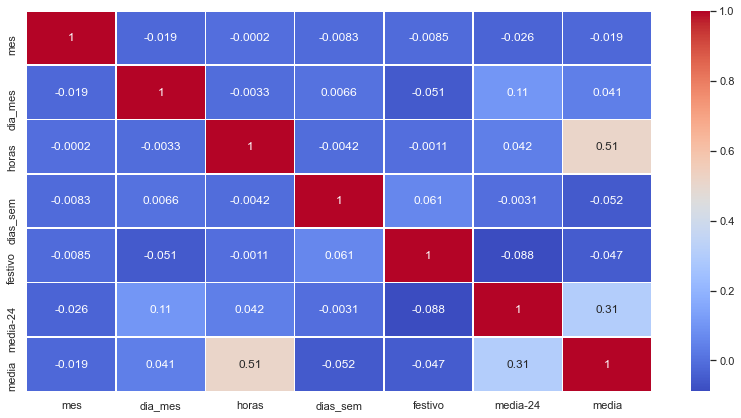

In [200]:
#Correlación de las variables con respecto a estado
df_corr = df_test[['mes','dia_mes','horas','dias_sem','festivo','media-24','media']]
fig, ax = plt.subplots(figsize=(14,7))
sns.heatmap(data=df_corr.astype({'media': 'int32'}).corr(),annot=True,vmax=1.0, cmap='coolwarm',\
            linewidths=.5, ax=ax);

In [201]:
#Generamos las horas a 31/12/2015
start = '2015-12-31 00:00'
dates_24 = pd.date_range(start,freq='H',periods=24).to_frame()
dates_24.rename(columns={0: 'Fecha'},inplace = True)
dates_24.head(5)

,Fecha
2015-12-31 00:00:00,2015-12-31 00:00:00
2015-12-31 01:00:00,2015-12-31 01:00:00
2015-12-31 02:00:00,2015-12-31 02:00:00
2015-12-31 03:00:00,2015-12-31 03:00:00
2015-12-31 04:00:00,2015-12-31 04:00:00


In [202]:
#Generamos las horas a 01/01/2016
start = '2016-01-01 00:00'
pred_dates_24 = pd.date_range(start,freq='H',periods=24).to_frame()
pred_dates_24.rename(columns={0: 'Fecha'},inplace = True)
pred_dates_24.head(5)

,Fecha
2016-01-01 00:00:00,2016-01-01 00:00:00
2016-01-01 01:00:00,2016-01-01 01:00:00
2016-01-01 02:00:00,2016-01-01 02:00:00
2016-01-01 03:00:00,2016-01-01 03:00:00
2016-01-01 04:00:00,2016-01-01 04:00:00


### Baseline Model

In [203]:
def baseline_model(X_dummy,y_dummy,v_test_size):
    X_train,X_test,y_train,y_test=train_test_split(X_dummy,y_dummy,test_size=v_test_size,random_state=42)
    
    #print('Media Train: ',round(y_train.mean(),2))
    #print('Media Test : ',round(y_test.mean(),2))
    
    
    #predice la media de los datos de entrenamiento
    
    #Modelo Baseline
    lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)
    
    y_predict_dummy_mean = lm_dummy_mean.predict(X_test)
    
    rmse_media = []
    rmse_dummy_X = round((sqrt(mean_squared_error(y_test,y_predict_dummy_mean))),2)
    rmse_media.append(rmse_dummy_X)
    
    return rmse_media

In [204]:
#X_dummy = df_test[['mes','dia_mes','horas','dia_semana','id_tramo','festivo','media-24']]
X_dummy = df_test[['mes','dia_mes','horas','dias_sem','festivo','media-24']]
y_dummy = df_test['media']

stored = []

counter = 0
for x_d,y_d,z_d in zip(range(0,3),range(0,3),range(0,3)):
    counter +=1
    print('Iteración :',counter)

    x_1 = baseline_model(X_dummy,y_dummy,0.10)
    stored.append(x_1)
    x_2 = baseline_model(X_dummy,y_dummy,0.20)
    stored.append(x_2)
    x_3 = baseline_model(X_dummy,y_dummy,0.30)
    stored.append(x_3)

print(stored)

Iteración : 1
Iteración : 2
Iteración : 3
[[933.76], [946.85], [946.77], [933.76], [946.85], [946.77], [933.76], [946.85], [946.77]]


In [205]:
dummy_df = pd.DataFrame(data=stored,columns=['rmse_dummy'])
dummy_df

,rmse_dummy
0,933.76
1,946.85
2,946.77
3,933.76
4,946.85
5,946.77
6,933.76
7,946.85
8,946.77


In [206]:
dummy_rme_main_mean = dummy_df.mean()
dum = round(dummy_rme_main_mean,2)
print(dum)

rmse_dummy    942.46
dtype: float64


### k-Fold Cross-Validation

In [207]:
def cross_validation(X_cross,y_cross,c_test_size):
    global modelo_rf
    global X_train,X_test,y_train,y_test
    
    X_train,X_test,y_train,y_test=train_test_split(X_cross,y_cross,test_size=c_test_size,random_state=42)
    
    #print('Media Train: ',round(y_train.mean(),2))
    #print('Media Test : ',round(y_test.mean(),2))
    
    #Regresión Lineal
    modelo_rl = Ridge(alpha=1.0)
 
    #KNN
    modelo_knn = KNeighborsRegressor(n_neighbors = 2)

    #Random Forest
    modelo_rf = RandomForestRegressor(n_estimators=100,max_depth=8,bootstrap=True,verbose=0,\
                                      max_features = 'auto',random_state = 42)

    #Naive Bayes
    modelo_nb = GaussianNB()
    
    #Modelo Redes Neuronales
    model = Sequential()
    model.add(Dense(12, activation='relu', kernel_initializer='he_normal',input_dim=6)) #capa oculta
    model.add( Dropout(0.5) ) #evitar overfitting

    model.add(Dense(8,activation='relu', kernel_initializer='he_normal')) #capa oculta
    model.add( Dropout(0.5) )

    model.add(Dense(4,activation='relu', kernel_initializer='he_normal')) #capa oculta
    model.add( Dropout(0.5) )

    model.add(Dense(1,activation='sigmoid')) #capa salida
    model.add( Dropout(0.5) )

    #Compilación modelo NN
    model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])
    
    #Ejecución modelo NN
    model_nn = KerasClassifier(model,batch_size=500,epochs=30,verbose=1,shuffle=True)
    
    #definimos método cross_validation con kfolds
    cv = KFold(n_splits=10, random_state=1, shuffle=True) 
    
    #evaluamos los modelos con cross_val_score
    scores_lr = cross_val_score(modelo_rl, X_train, y_train, scoring='neg_mean_squared_error',cv=cv)
    scores_knn = cross_val_score(modelo_knn, X_train, y_train, scoring='neg_mean_squared_error',cv=cv)
    scores_rf = cross_val_score(modelo_rf, X_train, y_train, scoring='neg_mean_squared_error',cv=cv)
    scores_nb = cross_val_score(modelo_nb, X_train.astype(int), y_train.astype(int), scoring='neg_mean_squared_error',cv=cv)
    scores_nn = model.evaluate(X_train, y_train)
    
    rmse_cross = []

    rmse_lr = sqrt(mean(absolute(scores_lr)))
    rmse_cross.append(rmse_lr)

    rmse_knn = sqrt(mean(absolute(scores_knn)))
    rmse_cross.append(rmse_knn)

    rmse_rf = sqrt(mean(absolute(scores_rf)))
    rmse_cross.append(rmse_rf)

    rmse_nb = sqrt(mean(absolute(scores_nb)))
    rmse_cross.append(rmse_nb)

    rmse_nn = sqrt(mean(absolute(scores_nn)))
    rmse_cross.append(rmse_nn)
    
    
    #predicciones en test
    #pred_rl = cross_val_predict(modelo_rl, X_cross, y_cross, cv=5)
    modelo_rl.fit(X_train, y_train)
    pred_rl = modelo_rl.predict(X_test)
    
    #pred_knn = cross_val_predict(modelo_knn, X_cross, y_cross, cv=5)
    modelo_knn.fit(X_train, y_train)
    pred_knn = modelo_knn.predict(X_test)
    
    #pred_rf = cross_val_predict(modelo_rf, X_cross, y_cross, cv=5)
    modelo_rf.fit(X_train, y_train)
    global pred_rf
    pred_rf = modelo_rf.predict(X_test)
    
    #pred_nb = cross_val_predict(modelo_nb, X_cross.astype(int), y_cross.astype(int), cv=5)
    modelo_nb.fit(X_train.astype(int), y_train.astype(int))
    pred_nb = modelo_nb.predict(X_test.astype(int))
    
    pred_nn = model.predict(X_test)
    
    return rmse_cross

In [208]:
#X_cross = df_test[['mes','dia_mes','horas','dia_semana','id_tramo','festivo','media-24']]
X_cross = df_test[['mes','dia_mes','horas','dias_sem','festivo','media-24']]
y_cross = df_test['media']

In [209]:
cross_1 = []
cross_2 = []
cross_3 = []

c = 0
for x,y,z in zip(range(0,3),range(0,3),range(0,3)):
    c +=1
    print('Iteración :',c)
    
    x = cross_validation(X_cross,y_cross,0.10)
    cross_1.append(x)
    
    y = cross_validation(X_cross,y_cross,0.20)
    cross_2.append(y)
    
    z = cross_validation(X_cross,y_cross,0.30)
    cross_3.append(z)


Iteración : 1
169/169 [==============================] - 0s 672us/step - loss: 3292654.2500 - mse: 3292654.2500
Iteración : 2
169/169 [==============================] - 0s 644us/step - loss: 3292658.0000 - mse: 3292658.0000
Iteración : 3
169/169 [==============================] - 0s 654us/step - loss: 3289581.2500 - mse: 3289581.2500


In [210]:
cross_merged = [cross_1,cross_2,cross_3]

cross_df = pd.DataFrame(np.concatenate(cross_merged),columns=['RL','KNN','RF','NB','NN'])
cross_df

,RL,KNN,RF,NB,NN
0,774.550099,723.747802,434.687219,756.899723,1815.661450
1,774.550099,723.747802,434.687219,756.899723,1815.661519
2,774.550099,723.747802,434.687219,756.899723,1815.661932
3,775.045900,731.839253,434.861281,774.422610,1813.871205
4,775.045900,731.839253,434.861281,774.422610,1813.022821
5,775.045900,731.839253,434.861281,774.422610,1813.175322
6,776.670065,729.634183,438.352122,777.191541,1814.567235
7,776.670065,729.634183,438.352122,777.191541,1814.568268
8,776.670065,729.634183,438.352122,777.191541,1813.720279


In [211]:
df_cross_mean = [cross_df.mean()]

df_mean = pd.DataFrame(df_cross_mean)
df_mean.T

,0
RL,775.422021
KNN,728.407079
RF,435.966874
NB,769.504625
NN,1814.434448


***Tramo 101***

In [25]:
#Tramo 101
columnas_rmse =['Baseline','RL','KNN','RF','NB','NN']
rmse_modelos_101 = [949.16,757.34,853.86,481.50,807.11,1545.49]

zip_101 = zip(columnas_rmse,rmse_modelos_101)
df_101 = pd.DataFrame(zip_101, columns = ['Modelo' , 'RMSE'])
df_101

,Modelo,RMSE
0,Baseline,949.16
1,RL,757.34
2,KNN,853.86
3,RF,481.50
4,NB,807.11
5,NN,1545.49


In [26]:
(df_101
 .style
 .background_gradient(subset=['RMSE'], cmap='GnBu_r')
 .set_caption('Acceso V-21'))

,Modelo,RMSE
0,Baseline,949.160000
1,RL,757.340000
2,KNN,853.860000
3,RF,481.500000
4,NB,807.110000
5,NN,1545.490000


***Tramo 1027***

In [64]:
#Tramo 1027
columnas_rmse =['Baseline','RL','KNN','RF','NB','NN']
rmse_modelos_1027 = [999.98,755.25,830.55,487.51,802.54,1747.24]

zip_1027 = zip(columnas_rmse,rmse_modelos_1027)
df_1027 = pd.DataFrame(zip_1027, columns = ['Modelo' , 'RMSE'])
df_1027.round(decimals=2)
df_1027

,Modelo,RMSE
0,Baseline,999.98
1,RL,755.25
2,KNN,830.55
3,RF,487.51
4,NB,802.54
5,NN,1747.24


In [65]:
(df_1027
 .style
 .background_gradient(subset=['RMSE'], cmap='GnBu_r')
 .set_caption('Av. Asias March'))

,Modelo,RMSE
0,Baseline,999.980000
1,RL,755.250000
2,KNN,830.550000
3,RF,487.510000
4,NB,802.540000
5,NN,1747.240000


***Tramo 1069***

In [101]:
#Tramo 1069
columnas_rmse =['Baseline','RL','KNN','RF','NB','NN']
rmse_modelos_1069 = [1044.12,844.359626,842.557237,487.860484,802.483676,1929.358206]

zip_1069 = zip(columnas_rmse,rmse_modelos_1069)
df_1069 = pd.DataFrame(zip_1069, columns = ['Modelo' , 'RMSE'])
df_1069.round(decimals=2)
df_1069

,Modelo,RMSE
0,Baseline,1044.120000
1,RL,844.359626
2,KNN,842.557237
3,RF,487.860484
4,NB,802.483676
5,NN,1929.358206


In [102]:
(df_1069
 .style
 .background_gradient(subset=['RMSE'], cmap='GnBu_r')
 .set_caption('Av. del Cid'))

,Modelo,RMSE
0,Baseline,1044.120000
1,RL,844.359626
2,KNN,842.557237
3,RF,487.860484
4,NB,802.483676
5,NN,1929.358206


***Tramo 1082***

In [138]:
#Tramo 1082
columnas_rmse =['Baseline','RL','KNN','RF','NB','NN']
rmse_modelos_1082 = [924.67,732.723166,823.006681,452.358676,747.654927,1536.838036]

zip_1082 = zip(columnas_rmse,rmse_modelos_1082)
df_1082 = pd.DataFrame(zip_1082, columns = ['Modelo' , 'RMSE'])
df_1082.round(decimals=2)
df_1082

,Modelo,RMSE
0,Baseline,924.670000
1,RL,732.723166
2,KNN,823.006681
3,RF,452.358676
4,NB,747.654927
5,NN,1536.838036


In [139]:
(df_1082
 .style
 .background_gradient(subset=['RMSE'], cmap='GnBu_r')
 .set_caption('Av. Cortes Valencianas'))

,Modelo,RMSE
0,Baseline,924.670000
1,RL,732.723166
2,KNN,823.006681
3,RF,452.358676
4,NB,747.654927
5,NN,1536.838036


***Tramo 10357***

In [212]:
#Tramo 10357
columnas_rmse =['Baseline','RL','KNN','RF','NB','NN']
rmse_modelos_10357 = [955.17,772.040754,765.008959,435.520586,755.833491,1816.395116]

zip_10357 = zip(columnas_rmse,rmse_modelos_10357)
df_10357 = pd.DataFrame(zip_10357, columns = ['Modelo' , 'RMSE'])
df_10357['RMSE'].round(decimals=2)
df_10357

,Modelo,RMSE
0,Baseline,955.170000
1,RL,772.040754
2,KNN,765.008959
3,RF,435.520586
4,NB,755.833491
5,NN,1816.395116


In [213]:
(df_10357
 .style
 .background_gradient(subset=['RMSE'], cmap='GnBu_r')
 .set_caption('Plaza Ayuntamiento'))

,Modelo,RMSE
0,Baseline,955.170000
1,RL,772.040754
2,KNN,765.008959
3,RF,435.520586
4,NB,755.833491
5,NN,1816.395116


***Tramo 107***

In [214]:
#Tramo 107
columnas_rmse =['Baseline','RL','KNN','RF','NB','NN']
rmse_modelos_107 = [476.05,480.75,765.008959,288.63,519.72,1187.80]

zip_107 = zip(columnas_rmse,rmse_modelos_107)
df_107 = pd.DataFrame(zip_107, columns = ['Modelo' , 'RMSE'])
df_107['RMSE'].round(decimals=2)
df_107

,Modelo,RMSE
0,Baseline,476.050000
1,RL,480.750000
2,KNN,765.008959
3,RF,288.630000
4,NB,519.720000
5,NN,1187.800000


In [215]:
(df_107
 .style
 .background_gradient(subset=['RMSE'], cmap='GnBu_r')
 .set_caption('Paseo Alameda'))

,Modelo,RMSE
0,Baseline,476.050000
1,RL,480.750000
2,KNN,765.008959
3,RF,288.630000
4,NB,519.720000
5,NN,1187.800000


### Predicciones Mejor Modelo

**Tramo 101 24 Horas**

In [27]:
df_predRF_101 = pd.DataFrame({'Actual': y_test, 'Predicción': pred_rf})
df_predRF_101

,Actual,Predicción
3395,1280.000000,1424.304360
1114,2582.500000,1673.302604
351,1794.000000,1868.555119
1983,685.000000,388.808410
2320,535.750000,522.619322
...,...,...
1456,151.666667,273.909744
2899,1457.250000,1399.935999
3652,1222.750000,1468.920684
3250,242.500000,563.082056


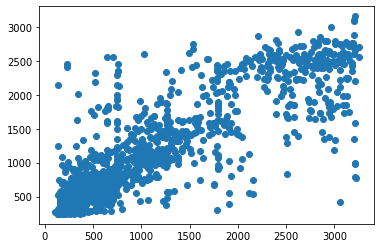

In [28]:
plt.scatter(df_predRF_101['Actual'],df_predRF_101['Predicción'])

In [29]:
#Cargamos dataset preparado de predecciones
dataML_pred_tramos_101 = pd.read_csv('/../TFM/Machine_Learning_Data/predictions/pred_data_sections_rolling_24_101.csv',sep=';',engine='python')
dataML_pred_tramos_101.head(5)

,año,mes,dia_mes,horas,dias_sem,id_tramos,festivo,media-24
0,2016,1,1,0,5,101,1,2026.596642
1,2016,1,1,1,5,101,1,2040.274019
2,2016,1,1,2,5,101,1,2046.888176
3,2016,1,1,3,5,101,1,2050.665962
4,2016,1,1,4,5,101,1,2056.294852


In [30]:
#Predicciones 24 Horas
new_predictions_101 = modelo_rf.predict(dataML_pred_tramos_101[['mes','dia_mes','horas','dias_sem','festivo','media-24']])
new_predictions_101

array([1051.59170235,  899.83251821,  544.72348184,  522.25162246,
        526.23891228,  577.62644979,  809.70001018, 2004.12072201,
       1963.90427929, 2032.33981557, 2217.17013328, 2342.86534031,
       2157.34252707, 2187.14431575, 2367.34109936, 2562.08614992,
       2579.26993379, 2595.12547582, 2602.42405015, 2572.8093731 ,
       2575.65424867, 2575.65424867, 2039.86157971,  948.09554803])

In [31]:
#unimos las predicciones con las horas
data_pred_rf_101 = pd.DataFrame(new_predictions_101,columns = ['media'])
data_pred_rf_101.insert(loc=0, column='Hora', value=np.arange(len(data_pred_rf_101)))
data_pred_rf_101.set_index('Hora',inplace=True)
data_pred_rf_101.head(5)

,media
Hora,
0,1051.591702
1,899.832518
2,544.723482
3,522.251622
4,526.238912


In [32]:
(data_pred_rf_101
 .style
 .background_gradient(subset=['media'], cmap='Greens')
 .set_caption('Predicciones 24H Acceso V-21'))

,media
Hora,
0,1051.591702
1,899.832518
2,544.723482
3,522.251622
4,526.238912
5,577.626450
6,809.700010
7,2004.120722
8,1963.904279


In [33]:
media_RF_24_101 = data_pred_rf_101.mean()
print(media_RF_24_101)

max_RF_24_101 = data_pred_rf_101.max()
print(max_RF_24_101)

min_RF_24_101 = data_pred_rf_101.min()
print(min_RF_24_101)

media    1802.298897
dtype: float64
media    2602.42405
dtype: float64
media    522.251622
dtype: float64


[Text(0.5, 1.0, 'Predicciones 24 Horas Acceso Barcelona')]

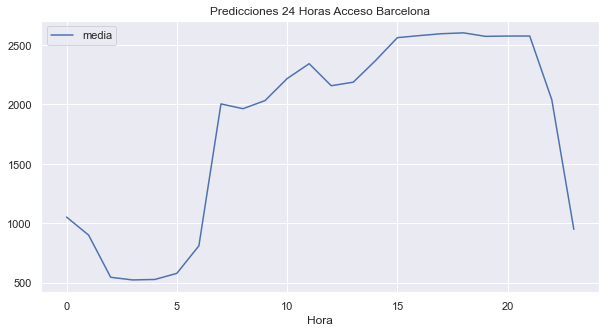

In [34]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 5))
#plt.margins(x=0,y=0)
sns.lineplot(data=data_pred_rf_101).set(title='Predicciones 24 Horas Acceso Barcelona')

In [35]:
#Medias tramo 101 31/12/2015
df_101 = dataML_tramos.loc[(dataML_tramos['año'] == 2015) & (dataML_tramos['mes'] == 12) & \
                                     (dataML_tramos['dia'] == 31) & (dataML_tramos['id_tramos'] == 101)]

new_row_0 = [2015, 12, 31,0,4,101,0,729.000000]
new_row_1 = [2015, 12, 31,3,4,101,0,322.000000]
new_row_2 = [2015, 12, 31,6,4,101,0,854.450000]
new_row_3 = [2015, 12, 31,7,4,101,0,1365.750000]
new_row_4 = [2015, 12, 31,11,4,101,0,3236.333333]
new_row_5 = [2015, 12, 31,12,4,101,0,3501.333333]
new_row_6 = [2015, 12, 31,13,4,101,0,3329.750000]
new_row_7 = [2015, 12, 31,14,4,101,0,3572.000000]
new_row_8 = [2015, 12, 31,15,4,101,0,3125.750000]

new_row_9 = [2015, 12, 31,18,4,101,0,3467.500000]
new_row_10 = [2015, 12, 31,19,4,101,0,3922.000000]
new_row_11 = [2015, 12, 31,20,4,101,0,2356.750000]
new_row_12 = [2015, 12, 31,21,4,101,0,1977.750000]

df_101.loc[len(df_101.index)] = new_row_0
df_101.loc[len(df_101.index)] = new_row_1
df_101.loc[len(df_101.index)] = new_row_2
df_101.loc[len(df_101.index)] = new_row_3
df_101.loc[len(df_101.index)] = new_row_4
df_101.loc[len(df_101.index)] = new_row_5
df_101.loc[len(df_101.index)] = new_row_6
df_101.loc[len(df_101.index)] = new_row_7
df_101.loc[len(df_101.index)] = new_row_8
df_101.loc[len(df_101.index)] = new_row_9
df_101.loc[len(df_101.index)] = new_row_10
df_101.loc[len(df_101.index)] = new_row_11
df_101.loc[len(df_101.index)] = new_row_12

df_sorted_101 = df_101.sort_values('horas')
#df_sorted_101
df_sorted_101_mean = df_sorted_101['media'].tolist()
df_sorted_101_mean

[729.0,
 670.25,
 435.75,
 322.0,
 246.33333333333331,
 242.0,
 854.45,
 1365.75,
 2274.6666666666665,
 2700.0,
 2924.75,
 3236.333333,
 3501.333333,
 3329.75,
 3572.0,
 3125.75,
 2910.333333333333,
 3202.5,
 3467.5,
 3922.0,
 2356.75,
 1977.75,
 647.3333333333334,
 392.0]

In [36]:
df_dates_101 = dates_24.copy()
df_dates_101['Media'] = df_sorted_101_mean
df_dates_101.set_index('Fecha',inplace=True)
df_dates_101

,Media
Fecha,
2015-12-31 00:00:00,729.000000
2015-12-31 01:00:00,670.250000
2015-12-31 02:00:00,435.750000
2015-12-31 03:00:00,322.000000
2015-12-31 04:00:00,246.333333
2015-12-31 05:00:00,242.000000
2015-12-31 06:00:00,854.450000
2015-12-31 07:00:00,1365.750000
2015-12-31 08:00:00,2274.666667


In [37]:
df_pred_dates_101 = pred_dates_24.copy()
df_pred_dates_101['Media'] = new_predictions_101
df_pred_dates_101.set_index('Fecha',inplace=True)
df_pred_dates_101

,Media
Fecha,
2016-01-01 00:00:00,1051.591702
2016-01-01 01:00:00,899.832518
2016-01-01 02:00:00,544.723482
2016-01-01 03:00:00,522.251622
2016-01-01 04:00:00,526.238912
2016-01-01 05:00:00,577.626450
2016-01-01 06:00:00,809.700010
2016-01-01 07:00:00,2004.120722
2016-01-01 08:00:00,1963.904279


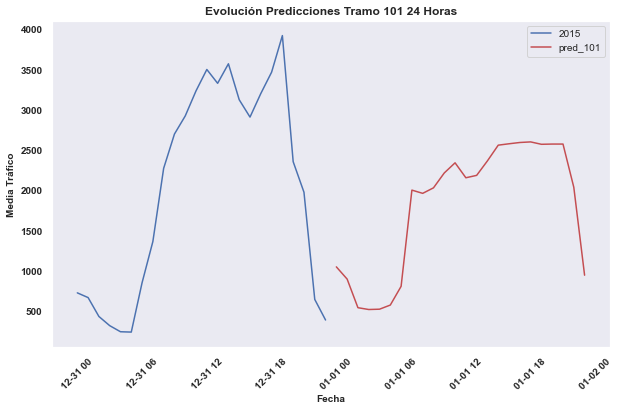

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(df_dates_101, linestyle='solid', color='b')
plt.plot(df_pred_dates_101, linestyle='solid', color='r')

plt.legend(['2015','pred_101'], loc='best', prop={'size': 10})
plt.title('Evolución Predicciones Tramo 101 24 Horas', weight='bold', fontsize=12)
plt.ylabel('Media Tráfico', weight='bold', fontsize=10)
plt.xlabel('Fecha', weight='bold', fontsize=10)
plt.xticks(weight='bold', fontsize=10, rotation=45)
plt.yticks(weight='bold', fontsize=10)
plt.grid(color = 'y', linewidth='0.5')
plt.show()

**-------------------------------------------------------------------------------------------------------**
**-------------------------------------------------------------------------------------------------------**

***Tramo 1027 24 Horas***

In [66]:
df_predRF_1027 = pd.DataFrame({'Actual': y_test, 'Predicción': pred_rf})
df_predRF_1027

,Actual,Predicción
4379,711.75,697.941400
393,987.75,1168.413192
1164,2671.25,2760.061539
4478,760.75,873.004632
731,2158.50,2111.815108
...,...,...
1652,2583.50,2586.925852
3291,795.00,2189.015813
3718,133.00,297.082982
1315,1082.50,488.823576


In [67]:
#Cargamos dataset preparado de predecciones
dataML_pred_tramos_1027 = pd.read_csv('/../TFM/Machine_Learning_Data/predictions/pred_data_sections_rolling_24_1027.csv',sep=';',engine='python')
dataML_pred_tramos_1027.head(5)

,año,mes,dia_mes,horas,dias_sem,id_tramos,festivo,media-24
0,2016,1,1,0,5,1027,1,1724.454647
1,2016,1,1,1,5,1027,1,1725.208972
2,2016,1,1,2,5,1027,1,1730.701812
3,2016,1,1,3,5,1027,1,1733.267968
4,2016,1,1,4,5,1027,1,1740.431346


In [68]:
#Predicciones 24 Horas
new_predictions_1027 = modelo_rf.predict(dataML_pred_tramos_1027[['mes','dia_mes','horas','dias_sem','festivo','media-24']])
new_predictions_1027

array([ 907.18099442,  844.35871849,  586.11256452,  508.78275912,
        507.39191471,  516.27808019,  664.62607838, 1048.60798159,
       1142.87969995, 1302.68979805, 1798.67879357, 2097.03799147,
       2193.45636537, 2238.69539281, 2230.79339766, 2142.25763444,
       2138.93189248, 2187.8884311 , 2631.14599743, 2633.675417  ,
       2633.675417  , 2649.93418694, 1897.30583558, 1013.91442809])

In [69]:
#unimos las predicciones con las horas
data_pred_rf_1027 = pd.DataFrame(new_predictions_1027,columns = ['media'])
data_pred_rf_1027.insert(loc=0, column='Hora', value=np.arange(len(data_pred_rf_1027)))
data_pred_rf_1027.set_index('Hora',inplace=True)


(data_pred_rf_1027
 .style
 .background_gradient(subset=['media'], cmap='Greens')
 .set_caption('Predicciones 24H Av.Ausias March'))

,media
Hora,
0,907.180994
1,844.358718
2,586.112565
3,508.782759
4,507.391915
5,516.278080
6,664.626078
7,1048.607982
8,1142.879700


In [70]:
media_RF_24_1027 = data_pred_rf_1027.mean()
print(media_RF_24_1027)

max_RF_24_1027 = data_pred_rf_1027.max()
print(max_RF_24_1027)

min_RF_24_1027 = data_pred_rf_1027.min()
print(min_RF_24_1027)

media    1604.845824
dtype: float64
media    2649.934187
dtype: float64
media    507.391915
dtype: float64


[Text(0.5, 1.0, 'Predicciones 24 Horas Av. Ausias March')]

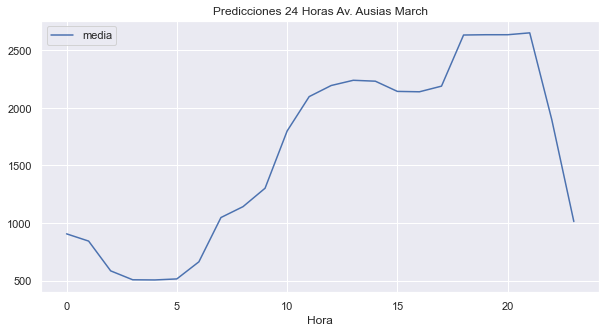

In [71]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 5))
sns.lineplot(data=data_pred_rf_1027).set(title='Predicciones 24 Horas Av. Ausias March')

In [72]:
#Medias tramo 1027 31/12/2015
df_before_1027 = dataML_tramos.loc[(dataML_tramos['año'] == 2015) & (dataML_tramos['mes'] == 12) & \
                                     (dataML_tramos['dia'] == 31) & (dataML_tramos['id_tramos'] == 1027)]

df_before_1027

,año,mes,dia,horas,dias_sem,id_tramos,festivo,media
3001840,2015,12,31,1,4,1027,0,684.750000
3002241,2015,12,31,2,4,1027,0,409.000000
3002643,2015,12,31,4,4,1027,0,225.666667
3003044,2015,12,31,5,4,1027,0,265.000000
3003417,2015,12,31,8,4,1027,0,1837.000000
3003817,2015,12,31,9,4,1027,0,2108.000000
3004214,2015,12,31,10,4,1027,0,2583.500000
3004608,2015,12,31,11,4,1027,0,2896.500000
3005743,2015,12,31,15,4,1027,0,2667.000000
3006132,2015,12,31,16,4,1027,0,2334.000000


In [73]:
new_row_0 = [2015, 12, 31,0,4,1027,0,711.500000]
new_row_1 = [2015, 12, 31,3,4,1027,0,336.000000]
new_row_2 = [2015, 12, 31,6,4,1027,0,429.500000]
new_row_3 = [2015, 12, 31,7,4,1027,0,1002.750000]
new_row_4 = [2015, 12, 31,12,4,1027,0,3101.333333]
new_row_5 = [2015, 12, 31,13,4,1027,0,3458.750000]
new_row_6 = [2015, 12, 31,14,4,1027,0,3611.000000]
new_row_7 = [2015, 12, 31,19,4,1027,0,2729.000000]
new_row_8 = [2015, 12, 31,20,4,1027,0,2155.750000]
new_row_9 = [2015, 12, 31,21,4,1027,0,1533.750000]

df_before_1027.loc[len(df_before_1027.index)] = new_row_0
df_before_1027.loc[len(df_before_1027.index)] = new_row_1
df_before_1027.loc[len(df_before_1027.index)] = new_row_2
df_before_1027.loc[len(df_before_1027.index)] = new_row_3
df_before_1027.loc[len(df_before_1027.index)] = new_row_4
df_before_1027.loc[len(df_before_1027.index)] = new_row_5
df_before_1027.loc[len(df_before_1027.index)] = new_row_6
df_before_1027.loc[len(df_before_1027.index)] = new_row_7
df_before_1027.loc[len(df_before_1027.index)] = new_row_8
df_before_1027.loc[len(df_before_1027.index)] = new_row_9

df_sorted_1027 = df_before_1027.sort_values('horas')
df_sorted_1027_mean = df_sorted_1027['media'].tolist()
df_sorted_1027_mean

[711.5,
 684.75,
 409.0,
 336.0,
 225.66666666666663,
 265.0,
 429.5,
 1002.75,
 1837.0,
 2108.0,
 2583.5,
 2896.5,
 3101.333333,
 3458.75,
 3611.0,
 2667.0,
 2334.0,
 2345.0,
 2483.0,
 2729.0,
 2155.75,
 1533.75,
 864.3333333333334,
 534.0]

In [74]:
df_dates_1027 = dates_24.copy()
df_dates_1027['Media'] = df_sorted_1027_mean
df_dates_1027.set_index('Fecha',inplace=True)
df_dates_1027

,Media
Fecha,
2015-12-31 00:00:00,711.500000
2015-12-31 01:00:00,684.750000
2015-12-31 02:00:00,409.000000
2015-12-31 03:00:00,336.000000
2015-12-31 04:00:00,225.666667
2015-12-31 05:00:00,265.000000
2015-12-31 06:00:00,429.500000
2015-12-31 07:00:00,1002.750000
2015-12-31 08:00:00,1837.000000


In [75]:
df_pred_dates_1027 = pred_dates_24.copy()
df_pred_dates_1027['Media'] = new_predictions_1027
df_pred_dates_1027.set_index('Fecha',inplace=True)
df_pred_dates_1027

,Media
Fecha,
2016-01-01 00:00:00,907.180994
2016-01-01 01:00:00,844.358718
2016-01-01 02:00:00,586.112565
2016-01-01 03:00:00,508.782759
2016-01-01 04:00:00,507.391915
2016-01-01 05:00:00,516.278080
2016-01-01 06:00:00,664.626078
2016-01-01 07:00:00,1048.607982
2016-01-01 08:00:00,1142.879700


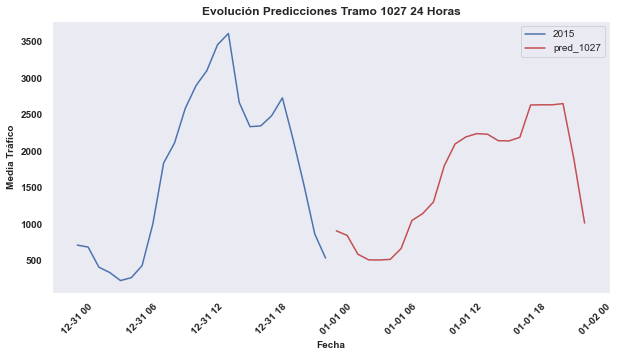

In [76]:
plt.figure(figsize=(10, 5))
plt.plot(df_dates_1027, linestyle='solid', color='b')
plt.plot(df_pred_dates_1027, linestyle='solid', color='r')

plt.legend(['2015','pred_1027'], loc='best', prop={'size': 10})
plt.title('Evolución Predicciones Tramo 1027 24 Horas', weight='bold', fontsize=12)
plt.ylabel('Media Tráfico', weight='bold', fontsize=10)
plt.xlabel('Fecha', weight='bold', fontsize=10)
plt.xticks(weight='bold', fontsize=10, rotation=45)
plt.yticks(weight='bold', fontsize=10)
plt.grid(color = 'y', linewidth='0.5')
plt.show()

**-------------------------------------------------------------------------------------------------------**
**-------------------------------------------------------------------------------------------------------**

***Tramo 1069 24 Horas***

In [103]:
df_predRF_1069 = pd.DataFrame({'Actual': y_test, 'Predicción': pred_rf})
df_predRF_1069

,Actual,Predicción
5223,2460.666667,2326.098787
3053,1835.000000,2149.027199
5329,327.500000,401.197725
3698,1996.750000,334.943629
3973,116.500000,374.285571
...,...,...
307,306.250000,627.528848
4078,1703.500000,2320.600114
3312,1432.500000,1837.575728
6808,337.750000,402.487649


In [104]:
#Cargamos dataset preparado de predecciones
dataML_pred_tramos_1069 = pd.read_csv('/../TFM/Machine_Learning_Data/predictions/pred_data_sections_rolling_24_1069.csv',sep=';',engine='python')
dataML_pred_tramos_1069.head(5)

,año,mes,dia_mes,horas,dias_sem,id_tramos,festivo,media-24
0,2016,1,1,0,5,1069,1,1408.407756
1,2016,1,1,1,5,1069,1,1413.910801
2,2016,1,1,2,5,1069,1,1418.255455
3,2016,1,1,3,5,1069,1,1425.230036
4,2016,1,1,4,5,1069,1,1435.218507


In [105]:
#Predicciones 24 Horas
new_predictions_1069 = modelo_rf.predict(dataML_pred_tramos_1069[['mes','dia_mes','horas','dias_sem','festivo','media-24']])
new_predictions_1069

array([ 693.9256545 ,  675.03445727,  347.59146084,  342.71823886,
        341.55056043,  345.51486223,  654.04427688,  809.35197453,
       1566.30771105, 1589.26511961, 1640.92748958, 1904.56360747,
       1843.08656515, 1842.70422424, 1819.00123217, 1812.14132403,
       1812.14132403, 1850.79018117, 1866.96596877, 1866.96596877,
       1866.96596877, 1885.75045676, 1288.1154404 , 1148.99134722])

In [106]:
#unimos las predicciones con las horas
data_pred_rf_1069 = pd.DataFrame(new_predictions_1069,columns = ['media'])
data_pred_rf_1069.insert(loc=0, column='Hora', value=np.arange(len(data_pred_rf_1069)))
data_pred_rf_1069.set_index('Hora',inplace=True)


(data_pred_rf_1069
 .style
 .background_gradient(subset=['media'], cmap='Greens')
 .set_caption('Predicciones 24H Av.del Cid'))

,media
Hora,
0,693.925655
1,675.034457
2,347.591461
3,342.718239
4,341.550560
5,345.514862
6,654.044277
7,809.351975
8,1566.307711


In [107]:
media_RF_24_1069 = data_pred_rf_1069.mean()
print(media_RF_24_1069)

max_RF_24_1069 = data_pred_rf_1069.max()
print(max_RF_24_1069)

min_RF_24_1069 = data_pred_rf_1069.min()
print(min_RF_24_1069)

media    1325.600642
dtype: float64
media    1904.563607
dtype: float64
media    341.55056
dtype: float64


[Text(0.5, 1.0, 'Predicciones 24 Horas Av. del Cid')]

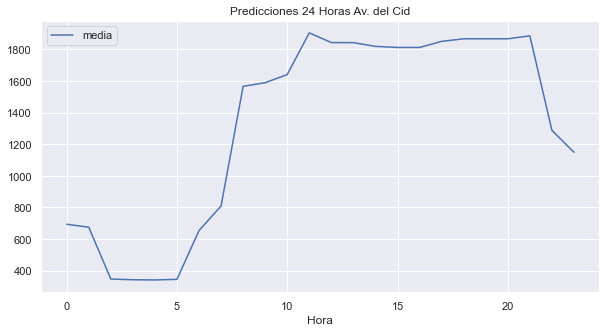

In [108]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 5))
sns.lineplot(data=data_pred_rf_1069).set(title='Predicciones 24 Horas Av. del Cid')

In [109]:
#Medias tramo 1069 31/12/2015
df_before_1069 = dataML_tramos.loc[(dataML_tramos['año'] == 2015) & (dataML_tramos['mes'] == 12) & \
                                     (dataML_tramos['dia'] == 31) & (dataML_tramos['id_tramos'] == 1069)]
df_before_1069

,año,mes,dia,horas,dias_sem,id_tramos,festivo,media
3001875,2015,12,31,1,4,1069,0,578.500000
3002276,2015,12,31,2,4,1069,0,290.500000
3002678,2015,12,31,4,4,1069,0,151.666667
3003078,2015,12,31,5,4,1069,0,169.000000
3003452,2015,12,31,8,4,1069,0,1755.666667
3003852,2015,12,31,9,4,1069,0,1907.000000
3004248,2015,12,31,10,4,1069,0,2368.750000
3004640,2015,12,31,11,4,1069,0,2432.750000
3005028,2015,12,31,12,4,1069,0,2801.750000
3005403,2015,12,31,13,4,1069,0,2905.000000


In [110]:
new_row_0 = [2015, 12, 31,0,4,1069,0,643.500000]
new_row_1 = [2015, 12, 31,3,4,1069,0,224.000000]
new_row_2 = [2015, 12, 31,6,4,1069,0,335.500000]
new_row_3 = [2015, 12, 31,7,4,1069,0,993.750000]
new_row_4 = [2015, 12, 31,14,4,1069,0,2587.000000]
new_row_5 = [2015, 12, 31,19,4,1069,0,2123.000000]
new_row_6 = [2015, 12, 31,20,4,1069,0,1748.750000]
new_row_7 = [2015, 12, 31,21,4,1069,0,1273.000000]

df_before_1069.loc[len(df_before_1069.index)] = new_row_0
df_before_1069.loc[len(df_before_1069.index)] = new_row_1
df_before_1069.loc[len(df_before_1069.index)] = new_row_2
df_before_1069.loc[len(df_before_1069.index)] = new_row_3
df_before_1069.loc[len(df_before_1069.index)] = new_row_4
df_before_1069.loc[len(df_before_1069.index)] = new_row_5
df_before_1069.loc[len(df_before_1069.index)] = new_row_6
df_before_1069.loc[len(df_before_1069.index)] = new_row_7

df_sorted_1069 = df_before_1069.sort_values('horas')
df_sorted_1069_mean = df_sorted_1069['media'].tolist()
df_sorted_1069_mean

[643.5,
 578.5,
 290.5,
 224.0,
 151.66666666666666,
 169.0,
 335.5,
 993.75,
 1755.6666666666667,
 1907.0,
 2368.75,
 2432.75,
 2801.75,
 2905.0,
 2587.0,
 2101.25,
 1692.3333333333333,
 1711.5,
 1728.0,
 2123.0,
 1748.75,
 1273.0,
 686.3333333333334,
 524.0]

In [111]:
df_dates_1069 = dates_24.copy()
df_dates_1069['Media'] = df_sorted_1069_mean
df_dates_1069.set_index('Fecha',inplace=True)
df_dates_1069

,Media
Fecha,
2015-12-31 00:00:00,643.500000
2015-12-31 01:00:00,578.500000
2015-12-31 02:00:00,290.500000
2015-12-31 03:00:00,224.000000
2015-12-31 04:00:00,151.666667
2015-12-31 05:00:00,169.000000
2015-12-31 06:00:00,335.500000
2015-12-31 07:00:00,993.750000
2015-12-31 08:00:00,1755.666667


In [112]:
df_pred_dates_1069 = pred_dates_24.copy()
df_pred_dates_1069['Media'] = new_predictions_1069
df_pred_dates_1069.set_index('Fecha',inplace=True)
df_pred_dates_1069

,Media
Fecha,
2016-01-01 00:00:00,693.925655
2016-01-01 01:00:00,675.034457
2016-01-01 02:00:00,347.591461
2016-01-01 03:00:00,342.718239
2016-01-01 04:00:00,341.550560
2016-01-01 05:00:00,345.514862
2016-01-01 06:00:00,654.044277
2016-01-01 07:00:00,809.351975
2016-01-01 08:00:00,1566.307711


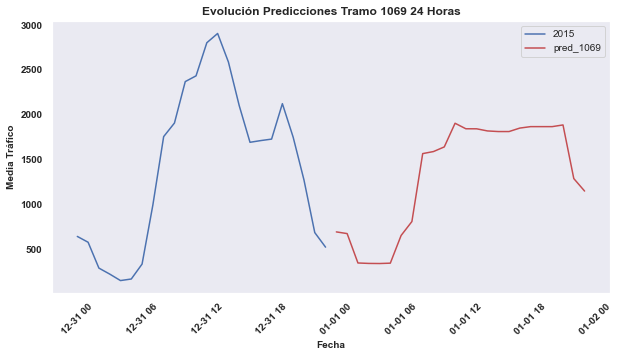

In [113]:
plt.figure(figsize=(10, 5))
plt.plot(df_dates_1069, linestyle='solid', color='b')
plt.plot(df_pred_dates_1069, linestyle='solid', color='r')

plt.legend(['2015','pred_1069'], loc='best', prop={'size': 10})
plt.title('Evolución Predicciones Tramo 1069 24 Horas', weight='bold', fontsize=12)
plt.ylabel('Media Tráfico', weight='bold', fontsize=10)
plt.xlabel('Fecha', weight='bold', fontsize=10)
plt.xticks(weight='bold', fontsize=10, rotation=45)
plt.yticks(weight='bold', fontsize=10)
plt.grid(color = 'y', linewidth='0.5')
plt.show()

**-------------------------------------------------------------------------------------------------------**
**-------------------------------------------------------------------------------------------------------**

***Predicciones Tramos 1082 24 Horas***

In [140]:
df_predRF_1082 = pd.DataFrame({'Actual': y_test, 'Predicción': pred_rf})
df_predRF_1082

,Actual,Predicción
2447,141.333333,417.454712
3712,136.000000,199.780258
1964,2266.750000,1388.685451
2554,2882.250000,2470.184195
1694,1783.000000,1867.938272
...,...,...
460,1272.000000,1480.137285
1067,1272.000000,923.341202
87,2339.666667,2674.744689
282,129.666667,233.230005


In [141]:
#Cargamos dataset preparado de predecciones
dataML_pred_tramos_1082 = pd.read_csv('/../TFM/Machine_Learning_Data/predictions/pred_data_sections_rolling_24_1082.csv',sep=';',engine='python')
dataML_pred_tramos_1082.head(5)

,año,mes,dia_mes,horas,dias_sem,id_tramos,festivo,media-24
0,2016,1,1,0,5,1082,1,1956.696760
1,2016,1,1,1,5,1082,1,1979.460593
2,2016,1,1,2,5,1082,1,1976.487413
3,2016,1,1,3,5,1082,1,1973.845288
4,2016,1,1,4,5,1082,1,1978.133326


In [142]:
#Predicciones 24 Horas
new_predictions_1082 = modelo_rf.predict(dataML_pred_tramos_1082[['mes','dia_mes','horas','dias_sem','festivo','media-24']])
new_predictions_1082

array([1558.99156673, 1690.05920331, 1233.95759808, 1082.04538338,
       1037.19670987, 1042.5435563 ,  906.30526006, 1477.30116175,
       1377.80053845, 1619.22627727, 2119.20716209, 2468.74591799,
       2507.7860842 , 2498.14613976, 2477.64214365, 2406.74781597,
       2351.07959178, 2341.98368748, 2453.89788673, 2467.08641336,
       2470.71558003, 2475.30600063, 2520.87023601, 1350.56264631])

In [143]:
#unimos las predicciones con las horas
data_pred_rf_1082 = pd.DataFrame(new_predictions_1082,columns = ['media'])
data_pred_rf_1082.insert(loc=0, column='Hora', value=np.arange(len(data_pred_rf_1082)))
data_pred_rf_1082.set_index('Hora',inplace=True)


(data_pred_rf_1082
 .style
 .background_gradient(subset=['media'], cmap='Greens')
 .set_caption('Predicciones 24H  Av.Cortes Valencianas'))

,media
Hora,
0,1558.991567
1,1690.059203
2,1233.957598
3,1082.045383
4,1037.196710
5,1042.543556
6,906.305260
7,1477.301162
8,1377.800538


In [144]:
media_RF_24_1082 = data_pred_rf_1082.mean()
print(media_RF_24_1082)

max_RF_24_1082 = data_pred_rf_1082.max()
print(max_RF_24_1082)

min_RF_24_1082 = data_pred_rf_1082.min()
print(min_RF_24_1082)

media    1913.966857
dtype: float64
media    2520.870236
dtype: float64
media    906.30526
dtype: float64


[Text(0.5, 1.0, 'Predicciones 24 Horas Av. Cortes Valencianas')]

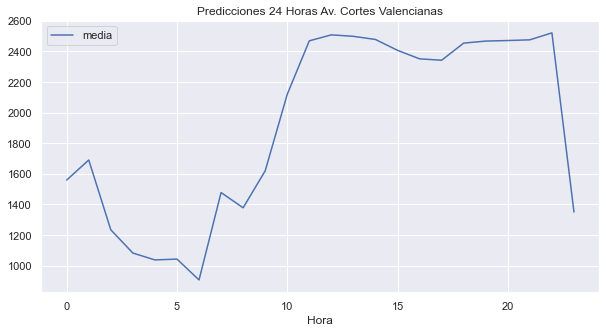

In [145]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 5))
sns.lineplot(data=data_pred_rf_1082).set(title='Predicciones 24 Horas Av. Cortes Valencianas')

In [146]:
#Medias tramo 1082 31/12/2015
df_before_1082 = dataML_tramos.loc[(dataML_tramos['año'] == 2015) & (dataML_tramos['mes'] == 12) & \
                                     (dataML_tramos['dia'] == 31) & (dataML_tramos['id_tramos'] == 1082)]
df_before_1082

,año,mes,dia,horas,dias_sem,id_tramos,festivo,media
3001886,2015,12,31,1,4,1082,0,1028.250000
3002287,2015,12,31,2,4,1082,0,604.500000
3002689,2015,12,31,4,4,1082,0,255.000000
3003089,2015,12,31,5,4,1082,0,176.000000
3003462,2015,12,31,8,4,1082,0,2356.666667
3003862,2015,12,31,9,4,1082,0,2942.000000
3006177,2015,12,31,16,4,1082,0,3101.666667
3006576,2015,12,31,17,4,1082,0,3238.000000
3007370,2015,12,31,22,4,1082,0,1024.333333
3007772,2015,12,31,23,4,1082,0,646.000000


In [147]:
new_row_0 = [2015, 12, 31,0,4,1082,0,1173.500000]
new_row_1 = [2015, 12, 31,3,4,1082,0,429.000000]
new_row_2 = [2015, 12, 31,6,4,1082,0,335.500000]
new_row_3 = [2015, 12, 31,7,4,1082,0,1127.750000]
new_row_4 = [2015, 12, 31,10,4,1082,0,3258.000000]
new_row_5 = [2015, 12, 31,11,4,1082,0,3567.000000]
new_row_6 = [2015, 12, 31,12,4,1082,0,2932.750000]
new_row_7 = [2015, 12, 31,13,4,1082,0,3076.000000]
new_row_8 = [2015, 12, 31,14,4,1082,0,3239.000000]
new_row_9 = [2015, 12, 31,15,4,1082,0,2715.500000]
new_row_10 = [2015, 12, 31,18,4,1082,0,3345.000000]
new_row_11 = [2015, 12, 31,19,4,1082,0,2892.000000]
new_row_12 = [2015, 12, 31,20,4,1082,0,1934.500000]
new_row_13 = [2015, 12, 31,21,4,1082,0,1297.500000]

df_before_1082.loc[len(df_before_1082.index)] = new_row_0
df_before_1082.loc[len(df_before_1082.index)] = new_row_1
df_before_1082.loc[len(df_before_1082.index)] = new_row_2
df_before_1082.loc[len(df_before_1082.index)] = new_row_3
df_before_1082.loc[len(df_before_1082.index)] = new_row_4
df_before_1082.loc[len(df_before_1082.index)] = new_row_5
df_before_1082.loc[len(df_before_1082.index)] = new_row_6
df_before_1082.loc[len(df_before_1082.index)] = new_row_7
df_before_1082.loc[len(df_before_1082.index)] = new_row_8
df_before_1082.loc[len(df_before_1082.index)] = new_row_9
df_before_1082.loc[len(df_before_1082.index)] = new_row_10
df_before_1082.loc[len(df_before_1082.index)] = new_row_11
df_before_1082.loc[len(df_before_1082.index)] = new_row_12
df_before_1082.loc[len(df_before_1082.index)] = new_row_13

df_sorted_1082 = df_before_1082.sort_values('horas')
df_sorted_1082_mean = df_sorted_1082['media'].tolist()
df_sorted_1082_mean

[1173.5,
 1028.25,
 604.5,
 429.0,
 255.0,
 176.0,
 335.5,
 1127.75,
 2356.6666666666665,
 2942.0,
 3258.0,
 3567.0,
 2932.75,
 3076.0,
 3239.0,
 2715.5,
 3101.6666666666665,
 3238.0,
 3345.0,
 2892.0,
 1934.5,
 1297.5,
 1024.3333333333333,
 646.0]

In [148]:
df_dates_1082 = dates_24.copy()
df_dates_1082['Media'] = df_sorted_1082_mean
df_dates_1082.set_index('Fecha',inplace=True)
df_dates_1082

,Media
Fecha,
2015-12-31 00:00:00,1173.500000
2015-12-31 01:00:00,1028.250000
2015-12-31 02:00:00,604.500000
2015-12-31 03:00:00,429.000000
2015-12-31 04:00:00,255.000000
2015-12-31 05:00:00,176.000000
2015-12-31 06:00:00,335.500000
2015-12-31 07:00:00,1127.750000
2015-12-31 08:00:00,2356.666667


In [149]:
df_pred_dates_1082 = pred_dates_24.copy()
df_pred_dates_1082['Media'] = new_predictions_1082
df_pred_dates_1082.set_index('Fecha',inplace=True)
df_pred_dates_1082

,Media
Fecha,
2016-01-01 00:00:00,1558.991567
2016-01-01 01:00:00,1690.059203
2016-01-01 02:00:00,1233.957598
2016-01-01 03:00:00,1082.045383
2016-01-01 04:00:00,1037.196710
2016-01-01 05:00:00,1042.543556
2016-01-01 06:00:00,906.305260
2016-01-01 07:00:00,1477.301162
2016-01-01 08:00:00,1377.800538


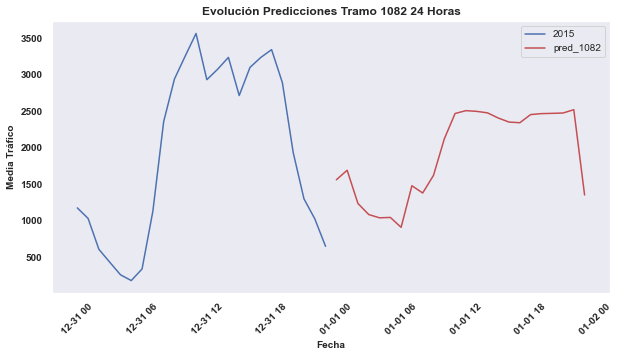

In [150]:
plt.figure(figsize=(10, 5))
plt.plot(df_dates_1082, linestyle='solid', color='b')
plt.plot(df_pred_dates_1082, linestyle='solid', color='r')

plt.legend(['2015','pred_1082'], loc='best', prop={'size': 10})
plt.title('Evolución Predicciones Tramo 1082 24 Horas', weight='bold', fontsize=12)
plt.ylabel('Media Tráfico', weight='bold', fontsize=10)
plt.xlabel('Fecha', weight='bold', fontsize=10)
plt.xticks(weight='bold', fontsize=10, rotation=45)
plt.yticks(weight='bold', fontsize=10)
plt.grid(color = 'y', linewidth='0.5')
plt.show()

**-------------------------------------------------------------------------------------------------------**
**-------------------------------------------------------------------------------------------------------**

***Predicciones Tramo 10357 24 Horas***

In [177]:
df_predRF_10357 = pd.DataFrame({'Actual': y_test, 'Predicción': pred_rf})
df_predRF_10357

,Actual,Predicción
2389,260.000000,386.292688
3034,318.333333,330.106929
6000,2458.250000,2075.121190
5351,806.666667,1025.927762
5477,2902.000000,2413.073389
...,...,...
2117,2550.250000,2383.957281
4017,1163.000000,435.336696
5839,2355.000000,2059.230379
4617,2736.000000,2378.866082


In [178]:
#Cargamos dataset preparado de predecciones
dataML_pred_tramos_10357 = pd.read_csv('/../TFM/Machine_Learning_Data/predictions/pred_data_sections_rolling_24_10357.csv',sep=';',engine='python')
dataML_pred_tramos_10357.head(5)

,año,mes,dia_mes,horas,dias_sem,id_tramos,festivo,media-24
0,2016,1,1,0,5,10357,1,1032.697234
1,2016,1,1,1,5,10357,1,1067.171938
2,2016,1,1,2,5,10357,1,1082.865431
3,2016,1,1,3,5,10357,1,1095.412680
4,2016,1,1,4,5,10357,1,1110.390485


In [179]:
#Predicciones 24 Horas
new_predictions_10357 = modelo_rf.predict(dataML_pred_tramos_10357[['mes','dia_mes','horas','dias_sem','festivo','media-24']])
new_predictions_10357

array([1186.27673894, 1227.30423561,  591.34497173,  484.1418128 ,
        484.1418128 ,  486.05382264,  501.86235075,  602.38122151,
       1084.43081428, 1053.53928776, 1435.1007476 , 1483.9428678 ,
       1840.48817017, 1857.79408896, 1851.77399817, 1831.99984572,
       1792.44223936, 1933.88141481, 2014.05794098, 2024.63499844,
       2056.8638624 , 1711.40979191,  918.55731111,  562.15355462])

In [180]:
#unimos las predicciones con las horas
data_pred_rf_10357 = pd.DataFrame(new_predictions_10357,columns = ['media'])
data_pred_rf_10357.insert(loc=0, column='Hora', value=np.arange(len(data_pred_rf_10357)))
data_pred_rf_10357.set_index('Hora',inplace=True)

#background_gradient: https://matplotlib.org/stable/tutorials/colors/colormaps.html

(data_pred_rf_10357
 .style
 .background_gradient(subset=['media'], cmap='Greens')
 .set_caption('Predicciones 24H  Plaza Ayuntamiento'))

,media
Hora,
0,1186.276739
1,1227.304236
2,591.344972
3,484.141813
4,484.141813
5,486.053823
6,501.862351
7,602.381222
8,1084.430814


In [181]:
media_RF_24_10357 = data_pred_rf_10357.mean()
print(media_RF_24_10357)

max_RF_24_10357 = data_pred_rf_10357.max()
print(max_RF_24_10357)

min_RF_24_10357 = data_pred_rf_10357.min()
print(min_RF_24_10357)

media    1292.357413
dtype: float64
media    2056.863862
dtype: float64
media    484.141813
dtype: float64


[Text(0.5, 1.0, 'Predicciones 24 Horas Plz. Ayuntamiento')]

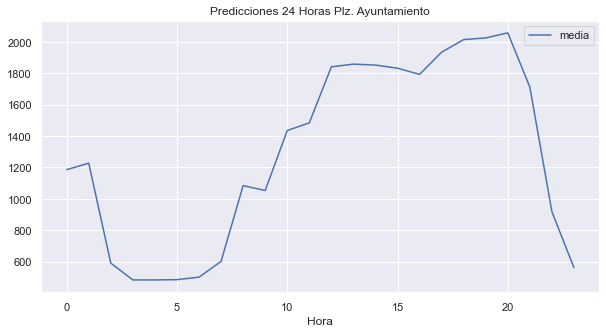

In [182]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 5))
sns.lineplot(data=data_pred_rf_10357).set(title='Predicciones 24 Horas Plz. Ayuntamiento')

In [183]:
#Medias tramo 10357 31/12/2015
df_before_10357 = dataML_tramos.loc[(dataML_tramos['año'] == 2015) & (dataML_tramos['mes'] == 12) & \
                                     (dataML_tramos['dia'] == 31) & (dataML_tramos['id_tramos'] == 10357)]
df_before_10357

,año,mes,dia,horas,dias_sem,id_tramos,festivo,media
3002153,2015,12,31,1,4,10357,0,369.750000
3002554,2015,12,31,2,4,10357,0,224.750000
3002955,2015,12,31,4,4,10357,0,142.666667
3003333,2015,12,31,5,4,10357,0,155.000000
3003729,2015,12,31,8,4,10357,0,1025.000000
3004127,2015,12,31,9,4,10357,0,1141.000000
3004522,2015,12,31,10,4,10357,0,1379.000000
3004912,2015,12,31,11,4,10357,0,1650.000000
3005290,2015,12,31,12,4,10357,0,2021.000000
3005661,2015,12,31,13,4,10357,0,2232.000000


In [184]:
new_row_0 = [2015, 12, 31,0,4,1082,0,476.500000]
new_row_1 = [2015, 12, 31,3,4,1082,0,201.000000]
new_row_2 = [2015, 12, 31,6,4,1082,0,333.500000]
new_row_3 = [2015, 12, 31,7,4,1082,0,825.750000]
new_row_4 = [2015, 12, 31,14,4,1082,0,2147.000000]
new_row_5 = [2015, 12, 31,19,4,1082,0,1239.000000]
new_row_6 = [2015, 12, 31,20,4,1082,0,976.750000]
new_row_7 = [2015, 12, 31,21,4,1082,0,534.000000]


df_before_10357.loc[len(df_before_10357.index)] = new_row_0
df_before_10357.loc[len(df_before_10357.index)] = new_row_1
df_before_10357.loc[len(df_before_10357.index)] = new_row_2
df_before_10357.loc[len(df_before_10357.index)] = new_row_3
df_before_10357.loc[len(df_before_10357.index)] = new_row_4
df_before_10357.loc[len(df_before_10357.index)] = new_row_5
df_before_10357.loc[len(df_before_10357.index)] = new_row_6
df_before_10357.loc[len(df_before_10357.index)] = new_row_7

df_sorted_10357= df_before_10357.sort_values('horas')
df_sorted_10357_mean = df_sorted_10357['media'].tolist()
df_sorted_10357_mean

[476.5,
 369.75,
 224.75,
 201.0,
 142.66666666666666,
 155.0,
 333.5,
 825.75,
 1025.0,
 1141.0,
 1379.0,
 1650.0,
 2021.0,
 2232.0,
 2147.0,
 1765.0,
 1470.0,
 1400.25,
 1511.0,
 1239.0,
 976.75,
 534.0,
 473.0,
 393.0]

In [185]:
df_dates_10357 = dates_24.copy()
df_dates_10357['Media'] = df_sorted_10357_mean
df_dates_10357.set_index('Fecha',inplace=True)
df_dates_10357

,Media
Fecha,
2015-12-31 00:00:00,476.500000
2015-12-31 01:00:00,369.750000
2015-12-31 02:00:00,224.750000
2015-12-31 03:00:00,201.000000
2015-12-31 04:00:00,142.666667
2015-12-31 05:00:00,155.000000
2015-12-31 06:00:00,333.500000
2015-12-31 07:00:00,825.750000
2015-12-31 08:00:00,1025.000000


In [186]:
df_pred_dates_10357 = pred_dates_24.copy()
df_pred_dates_10357['Media'] = new_predictions_10357
df_pred_dates_10357.set_index('Fecha',inplace=True)
df_pred_dates_10357

,Media
Fecha,
2016-01-01 00:00:00,1186.276739
2016-01-01 01:00:00,1227.304236
2016-01-01 02:00:00,591.344972
2016-01-01 03:00:00,484.141813
2016-01-01 04:00:00,484.141813
2016-01-01 05:00:00,486.053823
2016-01-01 06:00:00,501.862351
2016-01-01 07:00:00,602.381222
2016-01-01 08:00:00,1084.430814


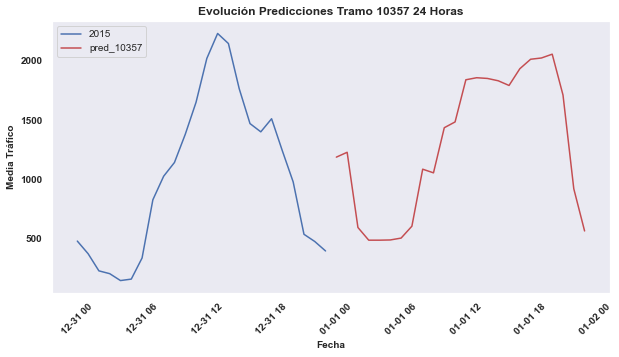

In [187]:
plt.figure(figsize=(10, 5))
plt.plot(df_dates_10357, linestyle='solid', color='b')
plt.plot(df_pred_dates_10357, linestyle='solid', color='r')

plt.legend(['2015','pred_10357'], loc='best', prop={'size': 10})
plt.title('Evolución Predicciones Tramo 10357 24 Horas', weight='bold', fontsize=12)
plt.ylabel('Media Tráfico', weight='bold', fontsize=10)
plt.xlabel('Fecha', weight='bold', fontsize=10)
plt.xticks(weight='bold', fontsize=10, rotation=45)
plt.yticks(weight='bold', fontsize=10)
plt.grid(color = 'y', linewidth='0.5')
plt.show()

***Tramo 107 24 Horas***

In [216]:
df_predRF_107 = pd.DataFrame({'Actual': y_test, 'Predicción': pred_rf})
df_predRF_107

,Actual,Predicción
2389,2091.250000,1991.355474
3034,2658.750000,2543.889162
6000,2013.000000,2001.699748
5351,2912.000000,2312.076840
5477,2904.500000,2277.905556
...,...,...
2117,2522.000000,2360.783239
4017,1454.000000,1559.986000
5839,2268.000000,1934.671157
4617,177.666667,624.137793


In [217]:
#Cargamos dataset preparado de predecciones
dataML_pred_tramos_107 = pd.read_csv('/../TFM/Machine_Learning_Data/predictions/pred_data_sections_rolling_24_107.csv',sep=';',engine='python')
dataML_pred_tramos_107.head(5)

,año,mes,dia_mes,horas,dias_sem,id_tramos,festivo,media-24
0,2016,1,1,0,5,107,1,696.892912
1,2016,1,1,1,5,107,1,704.849240
2,2016,1,1,2,5,107,1,704.415127
3,2016,1,1,3,5,107,1,708.614903
4,2016,1,1,4,5,107,1,714.689680


In [218]:
#Predicciones 24 Horas
new_predictions_107 = modelo_rf.predict(dataML_pred_tramos_107[['mes','dia_mes','horas','dias_sem','festivo','media-24']])
new_predictions_107

array([ 486.25732455,  443.68829445,  320.4776916 ,  297.80695872,
        297.80695872,  294.37253279,  347.50149561,  653.40321888,
       1195.18618702, 1185.24137094, 1142.61666462, 1052.02349205,
       1144.64111397, 1261.78447802, 1257.41139805, 1311.04377305,
       1319.8498919 , 1402.6724905 , 1398.7827524 , 1338.41785657,
       1329.63774433, 1314.75792141,  754.41385988,  450.80560666])

In [219]:
#unimos las predicciones con las horas
data_pred_rf_107 = pd.DataFrame(new_predictions_107,columns = ['media'])
data_pred_rf_107.insert(loc=0, column='Hora', value=np.arange(len(data_pred_rf_107)))
data_pred_rf_107.set_index('Hora',inplace=True)


(data_pred_rf_107
 .style
 .background_gradient(subset=['media'], cmap='Greens')
 #.highlight_min(axis=0, color='white')
 #.highlight_max(axis=0, color='red')
 .set_caption('Predicciones 24H Paseo Alameda'))

,media
Hora,
0,486.257325
1,443.688294
2,320.477692
3,297.806959
4,297.806959
5,294.372533
6,347.501496
7,653.403219
8,1195.186187


In [220]:
media_RF_24_107 = data_pred_rf_107.mean()
print(media_RF_24_107)

max_RF_24_107 = data_pred_rf_107.max()
print(max_RF_24_107)

min_RF_24_107 = data_pred_rf_107.min()
print(min_RF_24_107)

media    916.691712
dtype: float64
media    1402.67249
dtype: float64
media    294.372533
dtype: float64


[Text(0.5, 1.0, 'Predicciones 24 Horas Paseo Alameda')]

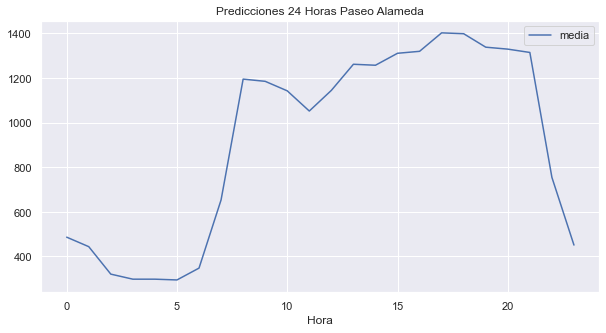

In [221]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 5))
sns.lineplot(data=data_pred_rf_107).set(title='Predicciones 24 Horas Paseo Alameda')

In [222]:
#Medias tramo 107 31/12/2015
df_before_107 = dataML_tramos.loc[(dataML_tramos['año'] == 2015) & (dataML_tramos['mes'] == 12) & \
                                     (dataML_tramos['dia'] == 31) & (dataML_tramos['id_tramos'] == 107)]
df_before_107

,año,mes,dia,horas,dias_sem,id_tramos,festivo,media
3001814,2015,12,31,1,4,107,0,328.750000
3002216,2015,12,31,2,4,107,0,257.000000
3002617,2015,12,31,4,4,107,0,86.000000
3003018,2015,12,31,5,4,107,0,99.000000
3003391,2015,12,31,8,4,107,0,577.333333
3003791,2015,12,31,9,4,107,0,637.000000
3004188,2015,12,31,10,4,107,0,910.250000
3004582,2015,12,31,11,4,107,0,1172.250000
3004972,2015,12,31,12,4,107,0,1336.500000
3005347,2015,12,31,13,4,107,0,1497.250000


In [223]:
new_row_0 = [2015, 12, 31,0,4,1082,0,412.250000]
new_row_1 = [2015, 12, 31,3,4,1082,0,131.000000]
new_row_2 = [2015, 12, 31,6,4,1082,0,184.500000]
new_row_3 = [2015, 12, 31,7,4,1082,0,378.750000]
new_row_4 = [2015, 12, 31,14,4,1082,0,1647.000000]
new_row_5 = [2015, 12, 31,19,4,1082,0,912.000000]
new_row_6 = [2015, 12, 31,20,4,1082,0,763.750000]
new_row_7 = [2015, 12, 31,21,4,1082,0,501.000000]


df_before_107.loc[len(df_before_107.index)] = new_row_0
df_before_107.loc[len(df_before_107.index)] = new_row_1
df_before_107.loc[len(df_before_107.index)] = new_row_2
df_before_107.loc[len(df_before_107.index)] = new_row_3
df_before_107.loc[len(df_before_107.index)] = new_row_4
df_before_107.loc[len(df_before_107.index)] = new_row_5
df_before_107.loc[len(df_before_107.index)] = new_row_6
df_before_107.loc[len(df_before_107.index)] = new_row_7

df_sorted_107= df_before_107.sort_values('horas')
df_sorted_107_mean = df_sorted_107['media'].tolist()
df_sorted_107_mean

[412.25,
 328.75,
 257.0,
 131.0,
 86.0,
 99.0,
 184.5,
 378.75,
 577.3333333333334,
 637.0,
 910.25,
 1172.25,
 1336.5,
 1497.25,
 1647.0,
 1267.75,
 961.3333333333334,
 979.25,
 953.0,
 912.0,
 763.75,
 501.0,
 387.6666666666667,
 218.0]

In [224]:
df_dates_107 = dates_24.copy()
df_dates_107['Media'] = df_sorted_107_mean
df_dates_107.set_index('Fecha',inplace=True)
df_dates_107

,Media
Fecha,
2015-12-31 00:00:00,412.250000
2015-12-31 01:00:00,328.750000
2015-12-31 02:00:00,257.000000
2015-12-31 03:00:00,131.000000
2015-12-31 04:00:00,86.000000
2015-12-31 05:00:00,99.000000
2015-12-31 06:00:00,184.500000
2015-12-31 07:00:00,378.750000
2015-12-31 08:00:00,577.333333


In [225]:
df_pred_dates_107 = pred_dates_24.copy()
df_pred_dates_107['Media'] = new_predictions_107
df_pred_dates_107.set_index('Fecha',inplace=True)
df_pred_dates_107

,Media
Fecha,
2016-01-01 00:00:00,486.257325
2016-01-01 01:00:00,443.688294
2016-01-01 02:00:00,320.477692
2016-01-01 03:00:00,297.806959
2016-01-01 04:00:00,297.806959
2016-01-01 05:00:00,294.372533
2016-01-01 06:00:00,347.501496
2016-01-01 07:00:00,653.403219
2016-01-01 08:00:00,1195.186187


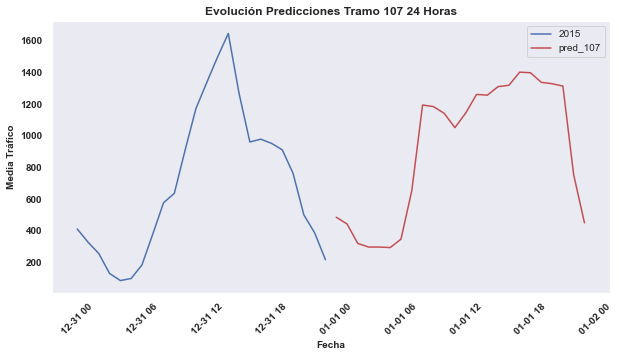

In [226]:
plt.figure(figsize=(10, 5))
plt.plot(df_dates_107, linestyle='solid', color='b')
plt.plot(df_pred_dates_107, linestyle='solid', color='r')

plt.legend(['2015','pred_107'], loc='best', prop={'size': 10})
plt.title('Evolución Predicciones Tramo 107 24 Horas', weight='bold', fontsize=12)
plt.ylabel('Media Tráfico', weight='bold', fontsize=10)
plt.xlabel('Fecha', weight='bold', fontsize=10)
plt.xticks(weight='bold', fontsize=10, rotation=45)
plt.yticks(weight='bold', fontsize=10)
plt.grid(color = 'y', linewidth='0.5')
plt.show()

**-------------------------------------------------------------------------------------------------------**
**-------------------------------------------------------------------------------------------------------**

***Gráficos Predicciones 24 Horas***

<AxesSubplot:xlabel='Hora', ylabel='media'>

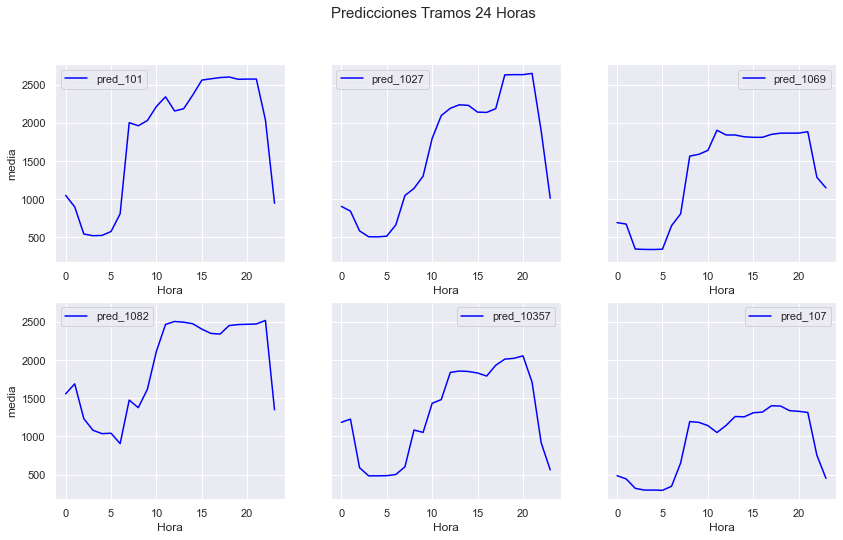

In [227]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8),sharey=True)
#plt.margins(x=0,y=0)

fig.suptitle('Predicciones Tramos 24 Horas',fontsize=15)

#sns.lineplot(ax=axes[0, 0], data=df_before_101['media'],color='red',label='dataset').set_title('Tramo 101')
sns.lineplot(ax=axes[0, 0], data=data_pred_rf_101['media'],color='blue',label='pred_101')
sns.lineplot(ax=axes[0, 1], data=data_pred_rf_1027['media'],color='blue',label='pred_1027')
sns.lineplot(ax=axes[0, 2], data=data_pred_rf_1069['media'],color='blue',label='pred_1069')
sns.lineplot(ax=axes[1, 0], data=data_pred_rf_1082['media'],color='blue',label='pred_1082')
sns.lineplot(ax=axes[1, 1], data=data_pred_rf_10357['media'],color='blue',label='pred_10357')
sns.lineplot(ax=axes[1, 2], data=data_pred_rf_107['media'],color='blue',label='pred_107')

***Gráficos Evolución Predicciones***

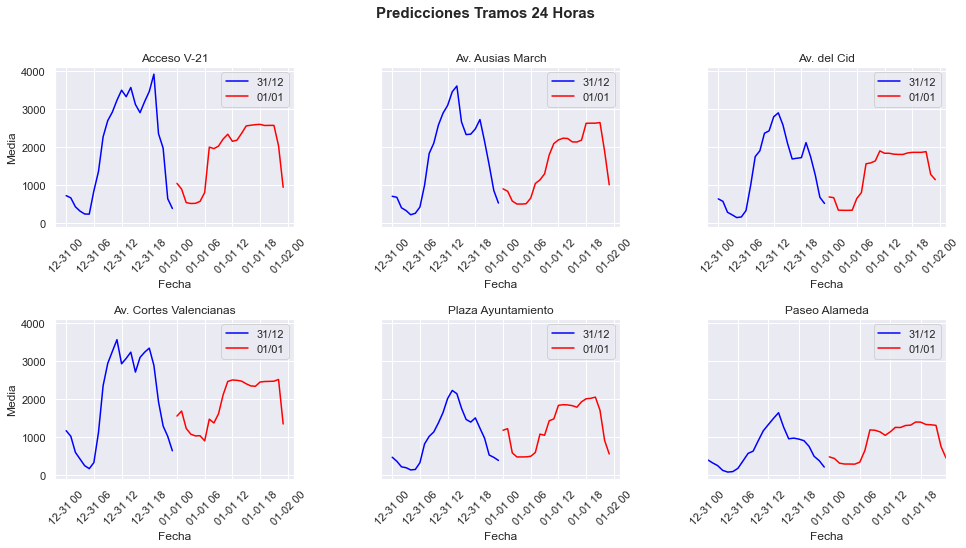

In [228]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8),sharey=True)
plt.margins(x=0,y=0)
fig.tight_layout(pad=6.0)
fig.suptitle('Predicciones Tramos 24 Horas',fontsize=15, weight='bold')

sns.lineplot(ax=axes[0, 0], data=df_dates_101['Media'],color='blue',label='31/12').set_title('Acceso V-21')
sns.lineplot(ax=axes[0, 0], data=df_pred_dates_101['Media'],color='red',label='01/01').set_title('Acceso V-21')
axes[0][0].tick_params(axis='x', rotation=45)

sns.lineplot(ax=axes[0, 1], data=df_dates_1027['Media'],color='blue',label='31/12').set_title('Av. Ausias March')
sns.lineplot(ax=axes[0, 1], data=df_pred_dates_1027['Media'],color='red',label='01/01').set_title('Av. Ausias March')
axes[0][1].tick_params(axis='x', rotation=45)

sns.lineplot(ax=axes[0, 2], data=df_dates_1069['Media'],color='blue',label='31/12').set_title('Av. del Cid')
sns.lineplot(ax=axes[0, 2], data=df_pred_dates_1069['Media'],color='red',label='01/01').set_title('Av. del Cid')
axes[0][2].tick_params(axis='x', rotation=45)

sns.lineplot(ax=axes[1, 0], data=df_dates_1082['Media'],color='blue',label='31/12').set_title('Av. Cortes Valencianas')
sns.lineplot(ax=axes[1, 0], data=df_pred_dates_1082['Media'],color='red',label='01/01').set_title('Av. Cortes Valencianas')
axes[1][0].tick_params(axis='x', rotation=45)

sns.lineplot(ax=axes[1, 1], data=df_dates_10357['Media'],color='blue',label='31/12').set_title('Plaza Ayuntamiento')
sns.lineplot(ax=axes[1, 1], data=df_pred_dates_10357['Media'],color='red',label='01/01').set_title('Plaza Ayuntamiento')
axes[1][1].tick_params(axis='x', rotation=45)

sns.lineplot(ax=axes[1, 2], data=df_dates_107['Media'],color='blue',label='31/12').set_title('Paseo Alameda')
sns.lineplot(ax=axes[1, 2], data=df_pred_dates_107['Media'],color='red',label='01/01').set_title('Paseo Alameda')
axes[1][2].tick_params(axis='x', rotation=45)

In [ ]:
#https://www.geeksforgeeks.org/dummy-regressor/
#https://www.kaggle.com/satishgunjal/tutorial-k-fold-cross-validation
#https://www.datasciencesmachinelearning.com/2018/12/time-series-cross-validation-and.html
#https://towardsdatascience.com/multiple-time-series-forecasting-with-pycaret-bc0a779a22fe
#https://www.aprendemachinelearning.com/sets-de-entrenamiento-test-validacion-cruzada/
#https://www.simplilearn.com/tutorials/machine-learning-tutorial/cross-validation
#https://algotrading101.com/learn/train-test-split/
#https://www.ritchieng.com/machine-learning-cross-validation/

***Medias 24 Horas Tramos 01/01/2015***

101

In [40]:
#Medias tramo 101 01/01/2015
df_101_year_ago = dataML_tramos.loc[(dataML_tramos['año'] == 2015) & (dataML_tramos['mes'] == 1) & \
                                     (dataML_tramos['dia'] == 1) & (dataML_tramos['id_tramos'] == 101)]

df_101_previous = df_101_year_ago[['horas','media']]
df_101_previous.rename(columns={'horas':'Hora'}, inplace=True)
df_101_previous.set_index('Hora',inplace=True)
df_101_previous.head(5)

,media
Hora,
0,419.333333
1,1524.666667
2,1118.666667
3,776.000000
4,652.666667


1027

In [77]:
#Medias tramo 1027 01/01/2015
df_1027_year_ago = dataML_tramos.loc[(dataML_tramos['año'] == 2015) & (dataML_tramos['mes'] == 1) & \
                                     (dataML_tramos['dia'] == 1) & (dataML_tramos['id_tramos'] == 1027)]
df_1027_previous = df_1027_year_ago[['horas','media']]
df_1027_previous.rename(columns={'horas':'Hora'}, inplace=True)
df_1027_previous.set_index('Hora',inplace=True)
df_1027_previous.head(5)

,media
Hora,
0,422.333333
1,1415.333333
2,1154.000000
3,863.000000
4,765.000000


1069

In [114]:
#Medias tramo 1069 01/01/2015
df_1069_year_ago = dataML_tramos.loc[(dataML_tramos['año'] == 2015) & (dataML_tramos['mes'] == 1) & \
                                     (dataML_tramos['dia'] == 1) & (dataML_tramos['id_tramos'] == 1069)]
df_1069_previous = df_1069_year_ago[['horas','media']]
df_1069_previous.rename(columns={'horas':'Hora'}, inplace=True)
df_1069_previous.set_index('Hora',inplace=True)
df_1069_previous.head(5)

,media
Hora,
0,530.000000
1,1487.333333
2,1227.000000
3,773.666667
4,843.333333


1082

In [151]:
#Medias tramo 1082 01/01/2015
df_1082_year_ago = dataML_tramos.loc[(dataML_tramos['año'] == 2015) & (dataML_tramos['mes'] == 1) & \
                                     (dataML_tramos['dia'] == 1) & (dataML_tramos['id_tramos'] == 1082)]
df_1082_previous = df_1082_year_ago[['horas','media']]
df_1082_previous.rename(columns={'horas':'Hora'}, inplace=True)
df_1082_previous.set_index('Hora',inplace=True)
df_1082_previous.head(5)

,media
Hora,
0,794.666667
1,2736.000000
2,2182.666667
3,1540.000000
4,1343.000000


10357

In [188]:
#Medias tramo 101 01/01/2015
df_10357_year_ago = dataML_tramos.loc[(dataML_tramos['año'] == 2015) & (dataML_tramos['mes'] == 1) & \
                                     (dataML_tramos['dia'] == 1) & (dataML_tramos['id_tramos'] == 10357)]

df_10357_previous = df_10357_year_ago[['horas','media']]
df_10357_previous.rename(columns={'horas':'Hora'}, inplace=True)
df_10357_previous.set_index('Hora',inplace=True)
df_10357_previous.head(5)

,media
Hora,
0,539.666667
1,2712.666667
2,1918.333333
3,1338.000000
4,1042.666667


In [229]:
#Medias tramo 101 01/01/2015
df_107_year_ago = dataML_tramos.loc[(dataML_tramos['año'] == 2015) & (dataML_tramos['mes'] == 1) & \
                                     (dataML_tramos['dia'] == 1) & (dataML_tramos['id_tramos'] == 107)]

df_107_previous = df_107_year_ago[['horas','media']]
df_107_previous.rename(columns={'horas':'Hora'}, inplace=True)
df_107_previous.set_index('Hora',inplace=True)
df_107_previous.head(5)

,media
Hora,
0,370.000000
1,1165.666667
2,1083.000000
3,811.333333
4,683.666667


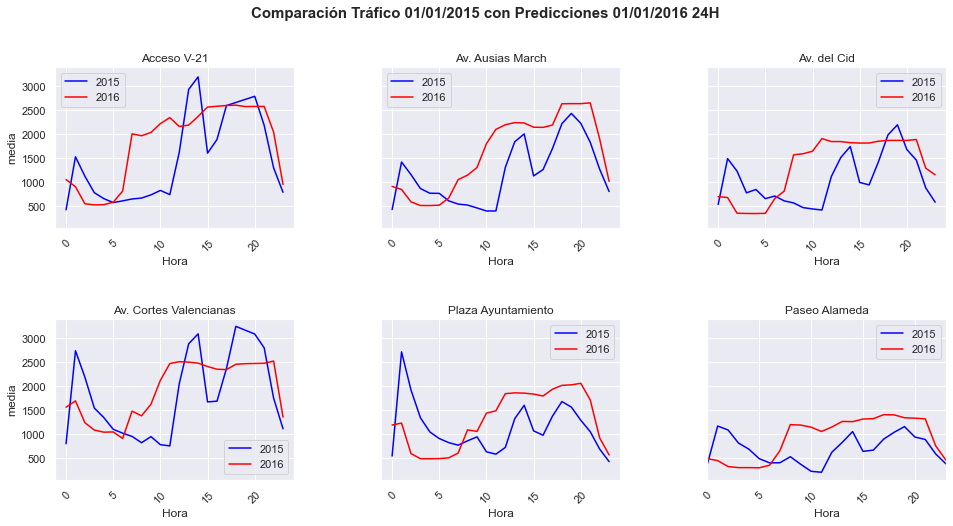

In [230]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8),sharey=True)
plt.margins(x=0,y=0)
fig.tight_layout(pad=6.0)
fig.suptitle('Comparación Tráfico 01/01/2015 con Predicciones 01/01/2016 24H',fontsize=15, weight='bold')

sns.lineplot(ax=axes[0, 0], data=df_101_previous['media'],color='blue',label='2015').set_title('Acceso V-21')
sns.lineplot(ax=axes[0, 0], data=data_pred_rf_101['media'],color='red',label='2016').set_title('Acceso V-21')
axes[0][0].tick_params(axis='x', rotation=45)

sns.lineplot(ax=axes[0, 1], data=df_1027_previous['media'],color='blue',label='2015').set_title('Av. Ausias March')
sns.lineplot(ax=axes[0, 1], data=data_pred_rf_1027['media'],color='red',label='2016').set_title('Av. Ausias March')
axes[0][1].tick_params(axis='x', rotation=45)

sns.lineplot(ax=axes[0, 2], data=df_1069_previous['media'],color='blue',label='2015').set_title('Av. del Cid')
sns.lineplot(ax=axes[0, 2], data=data_pred_rf_1069['media'],color='red',label='2016').set_title('Av. del Cid')
axes[0][2].tick_params(axis='x', rotation=45)

sns.lineplot(ax=axes[1, 0], data=df_1082_previous['media'],color='blue',label='2015').set_title('Av. Cortes Valencianas')
sns.lineplot(ax=axes[1, 0], data=data_pred_rf_1082['media'],color='red',label='2016').set_title('Av. Cortes Valencianas')
axes[1][0].tick_params(axis='x', rotation=45)

sns.lineplot(ax=axes[1, 1], data=df_10357_previous['media'],color='blue',label='2015').set_title('Plaza Ayuntamiento')
sns.lineplot(ax=axes[1, 1], data=data_pred_rf_10357['media'],color='red',label='2016').set_title('Plaza Ayuntamiento')
axes[1][1].tick_params(axis='x', rotation=45)

sns.lineplot(ax=axes[1, 2], data=df_107_previous['media'],color='blue',label='2015').set_title('Paseo Alameda')
sns.lineplot(ax=axes[1, 2], data=data_pred_rf_107['media'],color='red',label='2016').set_title('Paseo Alameda')
axes[1][2].tick_params(axis='x', rotation=45)